# Group 2 (Aditya Prashanth, Nikunj, Soumik, Chetanya, Aryaan)
# MobileWell400+
## Data Analysis on Sensor Statistics, and Stress vs Activity comparison

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Part 1: Sensor Statistics - Aditya Prashanth

In [2]:
file_loc = "MobileWell400+/"

## Exploring Light Data

In [3]:
light_data = pd.read_csv(f'{file_loc}light.csv')

In [4]:
# Dropping Unnecessary columns
light_data = light_data[['participant', 'timestamp', 'mean_lux']]
light_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345973 entries, 0 to 1345972
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   participant  1345973 non-null  object 
 1   timestamp    1345973 non-null  object 
 2   mean_lux     1345973 non-null  float64
dtypes: float64(1), object(2)
memory usage: 30.8+ MB


In [5]:
# Converting timestamp to date time format, and adding week column
light_data['timestamp'] = pd.to_datetime(light_data['timestamp'])
light_data['week'] = light_data['timestamp'].dt.isocalendar().week

In [6]:
light_data[light_data['mean_lux'] > 70000].count()

participant    1300
timestamp      1300
mean_lux       1300
week           1300
dtype: int64

In [7]:
light_data['mean_lux'].describe()

count    1.345973e+06
mean     3.408596e+05
std      2.582637e+07
min      0.000000e+00
25%      0.000000e+00
50%      6.125000e+00
75%      7.200000e+01
max      2.147484e+09
Name: mean_lux, dtype: float64

In [8]:
# Capping maximum to 70k lux only
light_data['mean_lux'] = light_data['mean_lux'].clip(upper=70000)
light_data.describe()

,timestamp,mean_lux,week
count,1345973,1.345973e+06,1345973.0
mean,2023-07-25 12:30:35.285366784,4.849923e+02,29.724076
min,2023-07-11 00:00:00.271113,0.000000e+00,28.0
25%,2023-07-18 09:05:48.984878080,0.000000e+00,29.0
50%,2023-07-25 12:46:53.862607104,6.125000e+00,30.0
75%,2023-08-01 18:41:49.994516992,7.200000e+01,31.0
max,2023-08-08 23:59:58.926352,7.000000e+04,32.0
std,NaN,3.478583e+03,1.229635


In [9]:
# grouping mean_lux by particpant and week and calculating weekly mean_lux avg per participant
light_weekly = light_data.groupby(['participant', 'week'])['mean_lux'].mean().reset_index()
light_weekly_agg = light_weekly.groupby('participant')['mean_lux'].mean().reset_index()

In [10]:
light_weekly_agg

,participant,mean_lux
0,AMdzA,793.977516
1,ASTAT,1205.049939
2,AWtpE,56.026615
3,AYTpR,98.864403
4,AZpyK,847.200695
...,...,...
362,rbYQC,299.449045
363,rgbxB,21.453615
364,rmWtX,989.802909
365,rsDwF,71.888889


In [11]:
top10_exposed_to_light = light_weekly_agg.sort_values(by='mean_lux', ascending=False).head(10)
top10_exposed_to_light

,participant,mean_lux
34,DYJdj,24639.483333
213,cAwNH,6100.833333
106,JrFmM,5353.128892
40,DxCYC,3301.261177
286,jcRGd,2816.264895
105,Jnryq,2774.889132
237,eFLdp,2715.775710
52,EswHG,2695.858814
203,bYgKC,2548.754465
108,JytXS,2415.637258


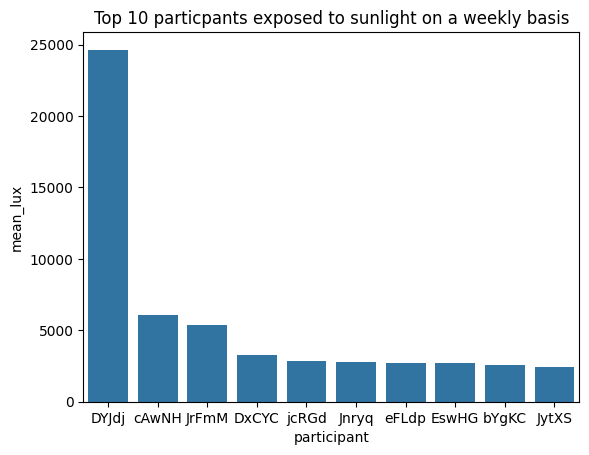

In [12]:
# Plotting the top 10 highest exposed participants
sns.barplot(data=top10_exposed_to_light, x='participant', y='mean_lux')
plt.title("Top 10 particpants exposed to sunlight on a weekly basis")
plt.show()

In [13]:
# Top 10 not exposed to light on a weekly basis
bottom10_exposed_to_light = light_weekly_agg.sort_values(by='mean_lux', ascending = True).head(10)
bottom10_exposed_to_light

,participant,mean_lux
320,mySfN,2.579688
154,PGaqa,3.640303
251,fLCnp,6.364000
110,KDAbb,7.000000
46,EdKkL,9.864851
304,kmFjT,10.245364
314,mXtqQ,10.433974
90,HfpxJ,12.864367
6,AtqXk,13.017493
78,GdnaZ,14.175784


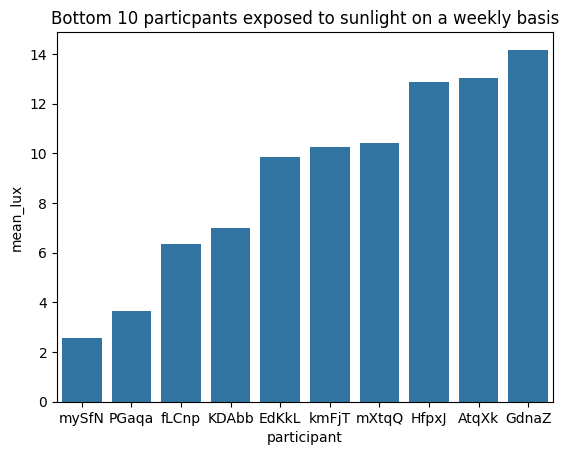

In [14]:
# Plotting the bottom 10 exposed participants
sns.barplot(data=bottom10_exposed_to_light, x='participant', y='mean_lux')
plt.title("Bottom 10 particpants exposed to sunlight on a weekly basis")
plt.show()

In [15]:
del light_data

## Exploring Noise data

In [16]:
noise = pd.read_csv(f"{file_loc}noise.csv")

In [17]:
noise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239798 entries, 0 to 239797
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   participant    239798 non-null  object 
 1   timestamp      239798 non-null  object 
 2   max_decibel    239798 non-null  float64
 3   min_decibel    239798 non-null  float64
 4   std_decibel    239798 non-null  float64
 5   mean_decibel   239798 non-null  float64
 6   num_samples    239798 non-null  int64  
 7   timestamp_UTC  239798 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 14.6+ MB


In [18]:
# Dropping unnecessary columns
noise = noise[['participant', 'timestamp', 'mean_decibel']]
noise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239798 entries, 0 to 239797
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   participant   239798 non-null  object 
 1   timestamp     239798 non-null  object 
 2   mean_decibel  239798 non-null  float64
dtypes: float64(1), object(2)
memory usage: 5.5+ MB


In [19]:
noise.describe()

,mean_decibel
count,239798.000000
mean,52.302468
std,15.913271
min,-5.518618
25%,39.697796
50%,52.091959
75%,64.636528
max,90.309131


In [20]:
# Capping minimum decibel to 0 
noise['mean_decibel'] = noise['mean_decibel'].clip(lower=0)
noise.describe()

,mean_decibel
count,239798.000000
mean,52.302571
std,15.912921
min,0.000000
25%,39.697796
50%,52.091959
75%,64.636528
max,90.309131


In [21]:
# converting timestamp to datetime and adding week column
noise['timestamp'] = pd.to_datetime(noise['timestamp'])
noise['week'] = noise['timestamp'].dt.isocalendar().week

In [22]:
# grouping mean_decibel by participant and week, followed by weekly aggregate
noise_weekly = noise.groupby(['participant', 'week'])['mean_decibel'].mean().reset_index()
noise_weekly_agg = noise_weekly.groupby('participant')['mean_decibel'].mean().reset_index()
noise_weekly_agg

,participant,mean_decibel
0,AMdzA,68.824147
1,ASTAT,69.849831
2,AWtpE,58.272097
3,AYTpR,67.442302
4,AZpyK,63.415482
...,...,...
336,raCsm,56.141364
337,rbYQC,70.143973
338,rmWtX,63.390733
339,rsDwF,58.431493


In [23]:
# Top 10 particpants exposed to low noise on a weely basis followed by highest exposure
top10_lowest_noise = noise_weekly_agg.sort_values(by='mean_decibel', ascending=True).head(10)
bottom10_lowest_noise = noise_weekly_agg.sort_values(by='mean_decibel', ascending=False).head(10)

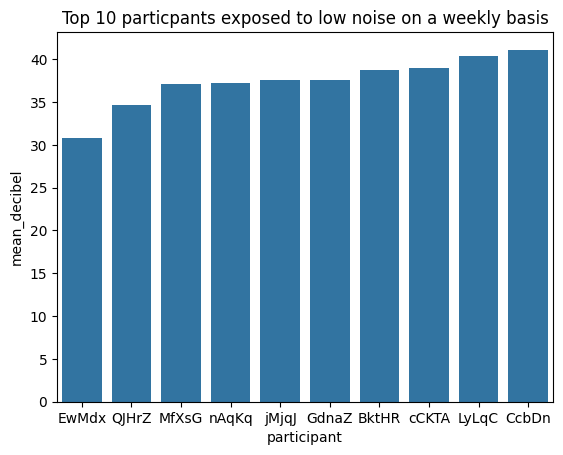

In [24]:
# Plotting the barplots
sns.barplot(data=top10_lowest_noise, x='participant', y='mean_decibel')
plt.title("Top 10 particpants exposed to low noise on a weekly basis")
plt.show()

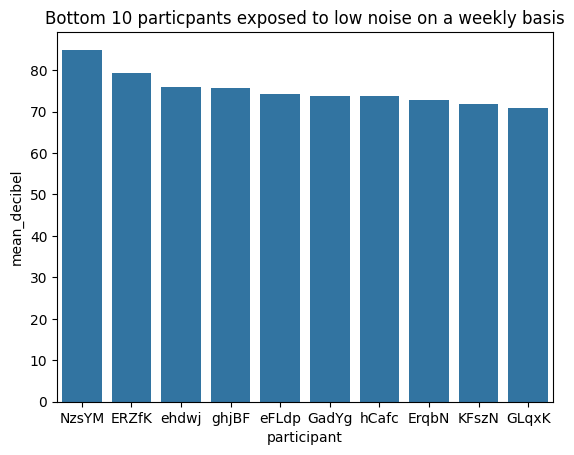

In [25]:
sns.barplot(data=bottom10_lowest_noise, x='participant', y='mean_decibel')
plt.title("Bottom 10 particpants exposed to low noise on a weekly basis")
plt.show()

In [26]:
del noise

## Exploring Activity

In [27]:
activity = pd.read_csv(f"{file_loc}activity_recognition.csv")

In [28]:
activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10045512 entries, 0 to 10045511
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   participant    object 
 1   timestamp      object 
 2   label          object 
 3   confidence     int64  
 4   timestamp_UTC  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 383.2+ MB


In [29]:
activity.isnull().sum()

participant      0
timestamp        0
label            0
confidence       0
timestamp_UTC    0
dtype: int64

In [30]:
# Keep necessary columns only
activity = activity[['participant', 'label', 'confidence']]
activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10045512 entries, 0 to 10045511
Data columns (total 3 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   participant  object
 1   label        object
 2   confidence   int64 
dtypes: int64(1), object(2)
memory usage: 229.9+ MB


In [31]:
common_activity_high_confidence = activity.groupby('label')['confidence'].mean().reset_index().sort_values(by='confidence', ascending=False)
common_activity_high_confidence

,label,confidence
4,TILTING,100.000000
0,IN_VEHICLE,91.370318
2,ON_FOOT,90.855619
1,ON_BICYCLE,85.582074
3,STILL,80.039314
5,UNKNOWN,39.980611


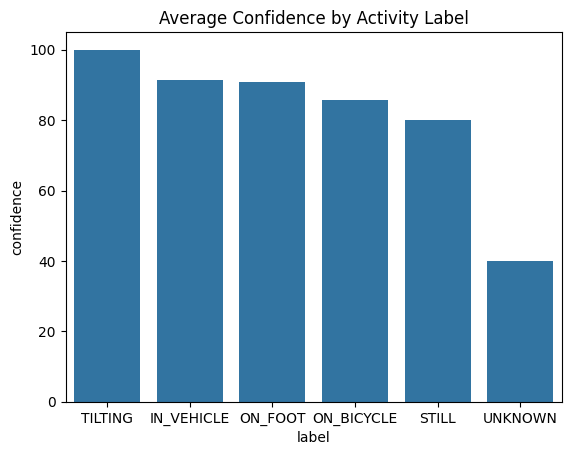

In [32]:
sns.barplot(x='label', y='confidence', data=common_activity_high_confidence)
plt.title('Average Confidence by Activity Label')
plt.show()

In [33]:
del activity

## Exploring Screen data

In [34]:
screen = pd.read_csv(f'{file_loc}screen.csv')

In [35]:
screen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133798 entries, 0 to 2133797
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   participant    object 
 1   timestamp      object 
 2   screen_event   object 
 3   timestamp_UTC  float64
dtypes: float64(1), object(3)
memory usage: 65.1+ MB


In [36]:
screen.isnull().sum()

participant      0
timestamp        0
screen_event     0
timestamp_UTC    0
dtype: int64

In [37]:
# keeping necessary columns only
screen = screen[['participant', 'screen_event', 'timestamp']]
screen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133798 entries, 0 to 2133797
Data columns (total 3 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   participant   object
 1   screen_event  object
 2   timestamp     object
dtypes: object(3)
memory usage: 48.8+ MB


In [38]:
# Converting timestamp to datetime format
screen['timestamp'] = pd.to_datetime(screen['timestamp'])

In [39]:
screen['screen_event'].unique()

array(['SCREEN_ON', 'SCREEN_OFF', 'SCREEN_UNLOCKED'], dtype=object)

In [40]:
# Visualizing the highest screen time amongst the particpant across 4 weeks
screen['next_event'] = screen.groupby('participant')['screen_event'].shift(-1)
screen['next_time'] = screen.groupby('participant')['timestamp'].shift(-1)

screen['duration'] = (screen['next_time']-screen['timestamp']).dt.total_seconds()/60

screen_sessions = screen[(screen['next_event'] == 'SCREEN_OFF') & (screen['screen_event'] == 'SCREEN_ON')]

In [41]:
screen_sessions

,participant,screen_event,timestamp,next_event,next_time,duration
0,AMdzA,SCREEN_ON,2023-07-11 06:20:01.758140,SCREEN_OFF,2023-07-11 06:20:31.715180,0.499284
2,AMdzA,SCREEN_ON,2023-07-11 06:30:02.199423,SCREEN_OFF,2023-07-11 06:30:18.047585,0.264136
7,AMdzA,SCREEN_ON,2023-07-11 06:36:40.861108,SCREEN_OFF,2023-07-11 06:36:46.367481,0.091773
15,AMdzA,SCREEN_ON,2023-07-11 07:13:54.343899,SCREEN_OFF,2023-07-11 07:14:05.695349,0.189191
17,AMdzA,SCREEN_ON,2023-07-11 07:14:08.234395,SCREEN_OFF,2023-07-11 07:14:23.740501,0.258435
...,...,...,...,...,...,...
2133774,rsgrE,SCREEN_ON,2023-08-08 20:13:24.852059,SCREEN_OFF,2023-08-08 20:13:35.814771,0.182712
2133782,rsgrE,SCREEN_ON,2023-08-08 20:27:09.925079,SCREEN_OFF,2023-08-08 20:27:20.892514,0.182791
2133784,rsgrE,SCREEN_ON,2023-08-08 20:28:59.765580,SCREEN_OFF,2023-08-08 20:29:10.710371,0.182413
2133786,rsgrE,SCREEN_ON,2023-08-08 20:29:11.005365,SCREEN_OFF,2023-08-08 20:29:22.018912,0.183559


In [42]:
screen_time_participant = screen_sessions.groupby('participant')['duration'].sum().reset_index(name='total_screen_time_min')

In [43]:
screen_time_participant

,participant,total_screen_time_min
0,AMdzA,654.222366
1,ASTAT,2916.792966
2,AWtpE,2595.611145
3,AYTpR,11676.780129
4,AZpyK,1064.502695
...,...,...
388,rbYQC,6057.927938
389,rgbxB,131.715786
390,rmWtX,15343.408457
391,rsDwF,773.636267


In [44]:
# Find top 10 users with maxium screen time across this study
top10_screen_time = screen_time_participant.sort_values(by='total_screen_time_min', ascending = False).head(10)
top10_screen_time

,participant,total_screen_time_min
86,GmCRH,36861.850964
68,FhWgg,31312.123250
350,nxkxr,26794.361876
339,mwNny,26485.539494
247,dEkJd,25306.295901
198,RefrL,20456.102140
313,kFCPz,19516.615400
40,DwmBF,19418.205813
26,CjznG,19215.688374
358,pMzyc,18420.446675


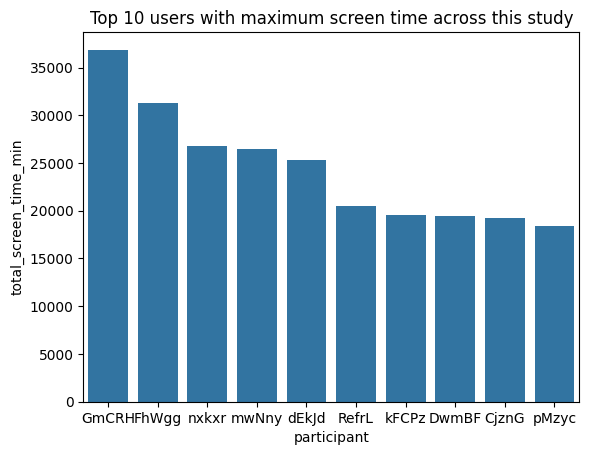

In [45]:
sns.barplot(x='participant', y='total_screen_time_min', data=top10_screen_time)
plt.title('Top 10 users with maximum screen time across this study')
plt.show()

In [46]:
# Find top 10 users with minimum screent time across this study
bottom10_screen_time = screen_time_participant.sort_values(by='total_screen_time_min', ascending=True).head(10)
bottom10_screen_time

,participant,total_screen_time_min
115,KDAbb,0.024111
35,DYJdj,0.225010
361,paPRX,1.401527
288,hQSFN,2.521600
174,PpXbD,4.182774
101,JMGEX,5.830761
337,mmmZZ,8.884845
116,KDKNc,9.482438
192,RPfea,10.255955
292,hpYpc,11.926975


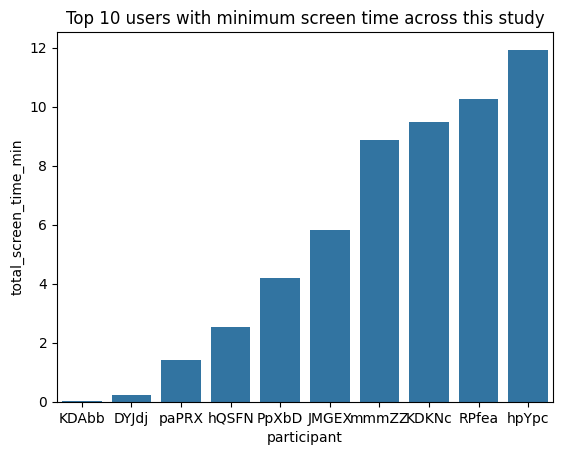

In [47]:
sns.barplot(x='participant', y='total_screen_time_min', data=bottom10_screen_time)
plt.title('Top 10 users with minimum screen time across this study')
plt.show()

In [48]:
del screen

## Exploring Connectivity

In [49]:
connectivity = pd.read_csv(f'{file_loc}connectivity.csv')

In [50]:
connectivity

,participant,timestamp,connectivity_status,timestamp_UTC
0,AMdzA,2023-07-11 06:30:32.524594,mobile,1.689050e+09
1,AMdzA,2023-07-11 06:30:45.647064,wifi,1.689050e+09
2,AMdzA,2023-07-11 07:16:04.829937,none,1.689053e+09
3,AMdzA,2023-07-11 07:16:06.256565,mobile,1.689053e+09
4,AMdzA,2023-07-11 07:54:47.653846,none,1.689055e+09
...,...,...,...,...
146054,rsgrE,2023-08-08 19:19:12.664165,mobile,1.691519e+09
146055,rsgrE,2023-08-08 19:45:33.129225,mobile,1.691520e+09
146056,rsgrE,2023-08-08 19:45:33.139172,mobile,1.691520e+09
146057,rsgrE,2023-08-08 20:35:32.201523,none,1.691523e+09


In [51]:
connectivity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146059 entries, 0 to 146058
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   participant          146059 non-null  object 
 1   timestamp            146059 non-null  object 
 2   connectivity_status  146059 non-null  object 
 3   timestamp_UTC        146059 non-null  float64
dtypes: float64(1), object(3)
memory usage: 4.5+ MB


In [52]:
# keeping necessary columns only
connectivity = connectivity[['connectivity_status']]

In [53]:
connectivity

,connectivity_status
0,mobile
1,wifi
2,none
3,mobile
4,none
...,...
146054,mobile
146055,mobile
146056,mobile
146057,none


In [54]:
connectivity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146059 entries, 0 to 146058
Data columns (total 1 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   connectivity_status  146059 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [55]:
connection_count = connectivity['connectivity_status'].value_counts().reset_index()
connection_count

,connectivity_status,count
0,mobile,52711
1,wifi,47283
2,none,45207
3,vpn,806
4,ethernet,52


In [56]:
connection_count.columns

Index(['connectivity_status', 'count'], dtype='object')

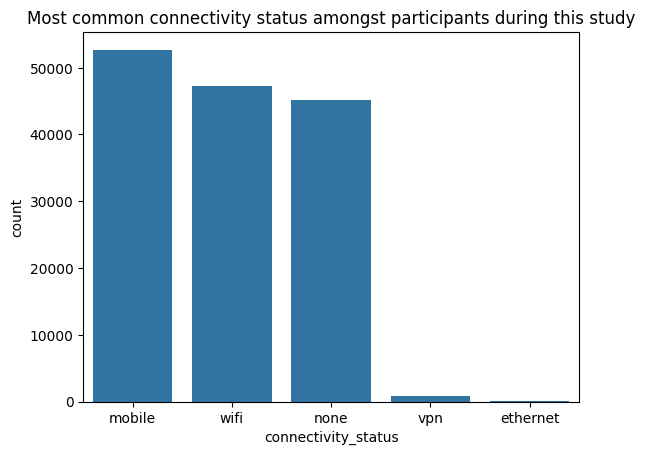

In [57]:
sns.barplot(data=connection_count, x='connectivity_status', y='count')
plt.title("Most common connectivity status amongst participants during this study")
plt.show()

In [58]:
del connectivity

In [59]:
# Deleting all possible variables employed so far to save space
del light_weekly_agg, top10_exposed_to_light, bottom10_exposed_to_light, noise_weekly_agg, top10_lowest_noise, bottom10_lowest_noise

In [60]:
del common_activity_high_confidence, screen_sessions, screen_time_participant, top10_screen_time, bottom10_screen_time, connection_count

# Part 2: Stress vs Activity

## (Impact of Light and Noise on General Life Satisfaction) - Aditya Prashanth

## Data Exploration, Preprocessing and Merging of Attributes from Daily Survey and Weekly Survey

In [61]:
daily_survey = pd.read_csv(f"{file_loc}daily_survey.csv")
weekly_survey = pd.read_csv(f"{file_loc}weekly_survey.csv")

In [62]:
daily_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22563 entries, 0 to 22562
Data columns (total 20 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   participant                                               22563 non-null  object 
 1   timestamp                                                 22563 non-null  object 
 2   valence                                                   22563 non-null  int64  
 3   energetic_arousal                                         22563 non-null  int64  
 4   tense_arousal                                             22563 non-null  int64  
 5   emotional_event                                           14128 non-null  float64
 6   social_quantity                                           22563 non-null  object 
 7   social_quality                                            18090 non-null  float64
 8   occasion        

In [63]:
daily_survey = daily_survey[['participant', 'social_quantity', 'social_quality', 'timestamp']]

In [64]:
daily_survey

,participant,social_quantity,social_quality,timestamp
0,AMdzA,3-5 persons,13.0,2023-07-11 10:22:04.359481
1,AMdzA,no,NaN,2023-07-11 16:13:52.944574
2,AMdzA,no,NaN,2023-07-11 22:04:39.585944
3,AMdzA,1 person,-10.0,2023-07-12 10:32:38.625786
4,AMdzA,1 person,NaN,2023-07-12 16:08:19.468367
...,...,...,...,...
22558,rsgrE,1 person,NaN,2023-08-02 22:05:42.985476
22559,rsgrE,1 person,31.0,2023-08-03 10:53:43.428105
22560,rsgrE,1 person,33.0,2023-08-03 16:07:06.261012
22561,rsgrE,1 person,23.0,2023-08-03 22:04:08.249560


In [65]:
weekly_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 34 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   participant                           1074 non-null   object 
 1   timestamp                             1074 non-null   object 
 2   health                                1074 non-null   object 
 3   physical_activity                     1074 non-null   object 
 4   TILS_1                                1074 non-null   int64  
 5   TILS_2                                1074 non-null   int64  
 6   TILS_3                                1074 non-null   int64  
 7   GSL                                   1074 non-null   int64  
 8   RELAT_LS                              1074 non-null   int64  
 9   WORK_LS                               1074 non-null   int64  
 10  FINAN_LS                              1074 non-null   int64  
 11  TIME_LS          

In [66]:
weekly_survey = weekly_survey[['participant', 'TILS_1', 'TILS_2', 'TILS_3', 'GSL', 'timestamp']]

In [67]:
weekly_survey

,participant,TILS_1,TILS_2,TILS_3,GSL,timestamp
0,AMdzA,1,1,1,3,2023-07-14 18:13:56.325378
1,AMdzA,1,1,2,3,2023-07-21 18:36:44.500888
2,AMdzA,1,1,1,3,2023-07-28 18:06:02.695196
3,AMdzA,2,2,2,3,2023-08-04 20:13:30.889408
4,ASTAT,1,1,1,3,2023-07-14 18:09:14.872259
...,...,...,...,...,...,...
1069,raCsm,2,2,1,3,2023-07-21 18:10:48.825826
1070,raCsm,2,2,2,2,2023-07-28 18:40:52.238470
1071,raCsm,2,2,2,3,2023-08-04 19:17:57.074465
1072,rgbxB,2,1,1,3,2023-07-28 22:49:11.015715


In [68]:
weekly_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   participant  1074 non-null   object
 1   TILS_1       1074 non-null   int64 
 2   TILS_2       1074 non-null   int64 
 3   TILS_3       1074 non-null   int64 
 4   GSL          1074 non-null   int64 
 5   timestamp    1074 non-null   object
dtypes: int64(4), object(2)
memory usage: 50.5+ KB


In [69]:
# Combining Three item loneliness scale to get the total score for TILS
weekly_survey['TILS_sum'] = weekly_survey['TILS_1'] + weekly_survey['TILS_2'] + weekly_survey['TILS_3'] 

In [70]:
weekly_survey.drop(['TILS_1', 'TILS_2', 'TILS_3'], axis=1, inplace=True)

In [71]:
weekly_survey

,participant,GSL,timestamp,TILS_sum
0,AMdzA,3,2023-07-14 18:13:56.325378,3
1,AMdzA,3,2023-07-21 18:36:44.500888,4
2,AMdzA,3,2023-07-28 18:06:02.695196,3
3,AMdzA,3,2023-08-04 20:13:30.889408,6
4,ASTAT,3,2023-07-14 18:09:14.872259,3
...,...,...,...,...
1069,raCsm,3,2023-07-21 18:10:48.825826,5
1070,raCsm,2,2023-07-28 18:40:52.238470,6
1071,raCsm,3,2023-08-04 19:17:57.074465,6
1072,rgbxB,3,2023-07-28 22:49:11.015715,4


In [72]:
# Cleaning daily survey data according to requirements
daily_survey['social_quality'].unique()

array([ 13.,  nan, -10.,  17., -21., -11.,  16.,  29.,  25.,  30.,  35.,
        22.,  23.,  24.,  18.,  28.,  33.,  38.,  50.,  27.,  34.,  42.,
        46.,  21.,  10.,  37.,  32., -12., -27.,  -4.,  49.,  31.,  40.,
       -50.,   5.,  12.,  20.,  26.,  36.,   3.,   9.,  39.,  44.,  48.,
       -42., -45., -32.,  14.,  43.,  41., -28.,  45.,  47.,  15.,  19.,
        -6.,  -5., -49.,  11.,   7.,  -2.,   6.,  -1., -16.,  -7.,   1.,
         2., -25.,   4., -20., -35., -24., -26., -31., -30., -34., -18.,
       -19.,  -8.,  -3., -47., -15., -14.,   0.,  -9., -22., -13., -41.,
       -17., -33., -23., -29., -39., -43., -37., -48., -40., -38., -36.,
       -44., -46.])

In [73]:
daily_survey['social_quantity'].unique()

array(['3-5 persons', 'no', '1 person', '2 persons', '5+ persons'],
      dtype=object)

In [74]:
# Replacing social_quality's nan values with 0
daily_survey['social_quality'] = daily_survey['social_quality'].fillna(0)

In [75]:
# Mapping the social quanitity values to integers
social_qty = {'no': 0, '1 person': 1, '2 persons': 2, '3-5 persons': 4, '5+ persons': 6}
daily_survey['social_qty_vals'] = daily_survey['social_quantity'].map(social_qty)

In [76]:
daily_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22563 entries, 0 to 22562
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   participant      22563 non-null  object 
 1   social_quantity  22563 non-null  object 
 2   social_quality   22563 non-null  float64
 3   timestamp        22563 non-null  object 
 4   social_qty_vals  22563 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 881.5+ KB


In [77]:
daily_survey

,participant,social_quantity,social_quality,timestamp,social_qty_vals
0,AMdzA,3-5 persons,13.0,2023-07-11 10:22:04.359481,4
1,AMdzA,no,0.0,2023-07-11 16:13:52.944574,0
2,AMdzA,no,0.0,2023-07-11 22:04:39.585944,0
3,AMdzA,1 person,-10.0,2023-07-12 10:32:38.625786,1
4,AMdzA,1 person,0.0,2023-07-12 16:08:19.468367,1
...,...,...,...,...,...
22558,rsgrE,1 person,0.0,2023-08-02 22:05:42.985476,1
22559,rsgrE,1 person,31.0,2023-08-03 10:53:43.428105,1
22560,rsgrE,1 person,33.0,2023-08-03 16:07:06.261012,1
22561,rsgrE,1 person,23.0,2023-08-03 22:04:08.249560,1


In [78]:
# Converting timestamps to datetime
daily_survey['timestamp'] = pd.to_datetime(daily_survey['timestamp'], errors = 'coerce')
weekly_survey['timestamp'] = pd.to_datetime(weekly_survey['timestamp'], errors='coerce')

In [79]:
# Extracting the week according to ISO Calendar
daily_survey['week'] = daily_survey['timestamp'].dt.isocalendar().week
weekly_survey['week'] = weekly_survey['timestamp'].dt.isocalendar().week

In [80]:
daily_survey[['timestamp', 'week']]

,timestamp,week
0,2023-07-11 10:22:04.359481,28
1,2023-07-11 16:13:52.944574,28
2,2023-07-11 22:04:39.585944,28
3,2023-07-12 10:32:38.625786,28
4,2023-07-12 16:08:19.468367,28
...,...,...
22558,2023-08-02 22:05:42.985476,31
22559,2023-08-03 10:53:43.428105,31
22560,2023-08-03 16:07:06.261012,31
22561,2023-08-03 22:04:08.249560,31


In [81]:
weekly_survey[['timestamp', 'week']]

,timestamp,week
0,2023-07-14 18:13:56.325378,28
1,2023-07-21 18:36:44.500888,29
2,2023-07-28 18:06:02.695196,30
3,2023-08-04 20:13:30.889408,31
4,2023-07-14 18:09:14.872259,28
...,...,...
1069,2023-07-21 18:10:48.825826,29
1070,2023-07-28 18:40:52.238470,30
1071,2023-08-04 19:17:57.074465,31
1072,2023-07-28 22:49:11.015715,30


In [82]:
merged = weekly_survey.merge(light_weekly, on=['participant', 'week'], how='inner')

merged

,participant,GSL,timestamp,TILS_sum,week,mean_lux
0,AMdzA,3,2023-07-14 18:13:56.325378,3,28,617.565777
1,AMdzA,3,2023-07-21 18:36:44.500888,4,29,1646.832475
2,AMdzA,3,2023-07-28 18:06:02.695196,3,30,609.722397
3,AMdzA,3,2023-08-04 20:13:30.889408,6,31,922.864670
4,ASTAT,3,2023-07-14 18:09:14.872259,3,28,639.141026
...,...,...,...,...,...,...
973,raCsm,3,2023-07-21 18:10:48.825826,5,29,851.462186
974,raCsm,2,2023-07-28 18:40:52.238470,6,30,283.267270
975,raCsm,3,2023-08-04 19:17:57.074465,6,31,554.506183
976,rgbxB,3,2023-07-28 22:49:11.015715,4,30,14.695090


In [83]:
merged = merged[['participant', 'GSL', 'week', 'mean_lux']]
merged

,participant,GSL,week,mean_lux
0,AMdzA,3,28,617.565777
1,AMdzA,3,29,1646.832475
2,AMdzA,3,30,609.722397
3,AMdzA,3,31,922.864670
4,ASTAT,3,28,639.141026
...,...,...,...,...
973,raCsm,3,29,851.462186
974,raCsm,2,30,283.267270
975,raCsm,3,31,554.506183
976,rgbxB,3,30,14.695090


In [84]:
# Getting monthly aggregate of aggregated weeks
agg = merged.groupby('participant').agg({
    'GSL': 'mean', 'mean_lux':'mean'
})

agg

,GSL,mean_lux
participant,,
AMdzA,3.000000,949.246330
ASTAT,3.500000,1142.817053
AWtpE,2.666667,72.036846
AYTpR,3.500000,98.481979
AZpyK,3.000000,835.792365
...,...,...
qmPjG,3.000000,50.715990
rDzfQ,2.500000,288.313876
raCsm,2.500000,434.282645


## Visualization of Trends and Distribution

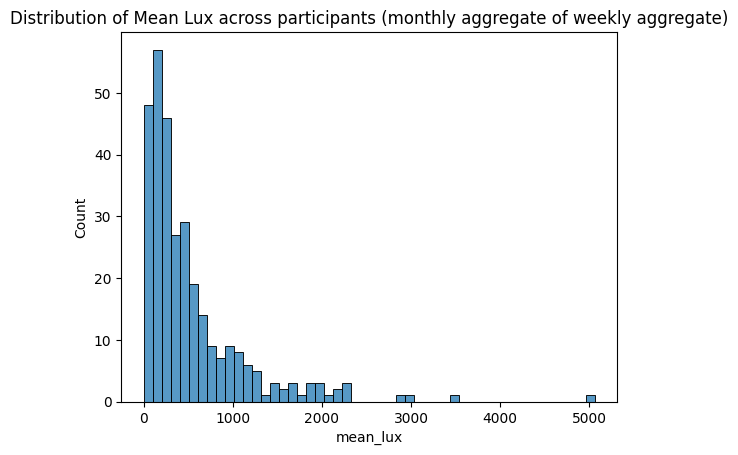

In [85]:
sns.histplot(data=agg, x='mean_lux', bins=50)
plt.title("Distribution of Mean Lux across participants (monthly aggregate of weekly aggregate)")
plt.show()

Text(0.5, 1.0, 'Distribution of GSL across participants (considering only light)')

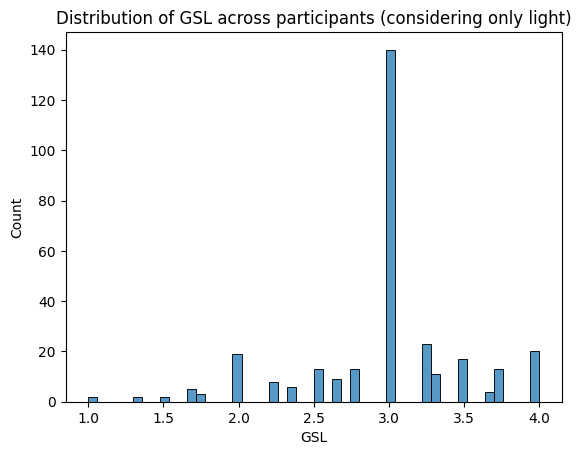

In [86]:
sns.histplot(data=agg, x='GSL', bins=50)
plt.title('Distribution of GSL across participants (considering only light)')

In [87]:
# 1. Higher exposure to light means higher GSL values
print(f"H0: Gen life satisfaction of people exposed to more light <= Gen life satisfaction of people exposed to less light")
print(f"HA: Gen life satisfaction of people exposed to more light > Gen life satisfaction of people exposed to less light")

low_qty = agg[agg['mean_lux'] < 1000]['GSL']
low_sample = low_qty.sample(n=40, random_state=32).reset_index(drop=True)
high_qty = agg[agg['mean_lux'] >= 1000]['GSL']
high_sample = high_qty.sample(n=40, random_state=36).reset_index(drop=True)

t1, p1 = stats.ttest_ind(high_sample, low_sample, alternative='greater', equal_var=False)
print(f"{t1: .3f}\n{p1: .3f}")
if(p1 < 0.05):
    print(f"Reject H0: Increase in light does increase gen life satisfaction")
else:
    print(f"Fail to Reject H0: Increase in light exposure doesn't necessarily increase gen life satifaction")

H0: Gen life satisfaction of people exposed to more light <= Gen life satisfaction of people exposed to less light
HA: Gen life satisfaction of people exposed to more light > Gen life satisfaction of people exposed to less light
 1.119
 0.133
Fail to Reject H0: Increase in light exposure doesn't necessarily increase gen life satifaction


In [88]:
merged = weekly_survey.merge(noise_weekly, on=['participant', 'week'], how='inner')

merged

,participant,GSL,timestamp,TILS_sum,week,mean_decibel
0,AMdzA,3,2023-07-14 18:13:56.325378,3,28,80.993452
1,AMdzA,3,2023-07-21 18:36:44.500888,4,29,63.567450
2,AMdzA,3,2023-08-04 20:13:30.889408,6,31,72.137007
3,ASTAT,3,2023-07-14 18:09:14.872259,3,28,70.698350
4,ASTAT,4,2023-07-21 18:04:42.950287,3,29,71.015802
...,...,...,...,...,...,...
899,raCsm,2,2023-07-14 18:11:35.230174,7,28,55.611500
900,raCsm,3,2023-07-21 18:10:48.825826,5,29,57.185456
901,raCsm,2,2023-07-28 18:40:52.238470,6,30,53.697216
902,raCsm,3,2023-08-04 19:17:57.074465,6,31,64.919822


In [89]:
merged = merged[['participant', 'GSL', 'week', 'mean_decibel']]
merged

,participant,GSL,week,mean_decibel
0,AMdzA,3,28,80.993452
1,AMdzA,3,29,63.567450
2,AMdzA,3,31,72.137007
3,ASTAT,3,28,70.698350
4,ASTAT,4,29,71.015802
...,...,...,...,...
899,raCsm,2,28,55.611500
900,raCsm,3,29,57.185456
901,raCsm,2,30,53.697216
902,raCsm,3,31,64.919822


In [90]:
# Getting monthly aggregate of aggregated weeks
agg = merged.groupby('participant').agg({
    'GSL': 'mean', 'mean_decibel':'mean'
})

agg

,GSL,mean_decibel
participant,,
AMdzA,3.000000,72.232637
ASTAT,3.500000,70.220756
AWtpE,2.666667,55.866838
AYTpR,3.500000,66.660941
AZpyK,3.000000,67.249115
...,...,...
qmPjG,3.000000,45.238919
rDzfQ,2.500000,48.436700
rPDMX,2.666667,43.849400


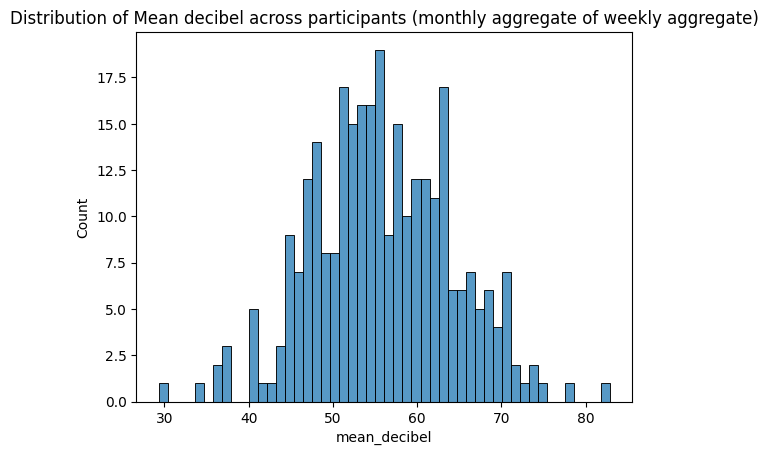

In [91]:
sns.histplot(data=agg, x='mean_decibel', bins=50)
plt.title("Distribution of Mean decibel across participants (monthly aggregate of weekly aggregate)")
plt.show()

Text(0.5, 1.0, 'Distribution of GSL across participants (considering only noise)')

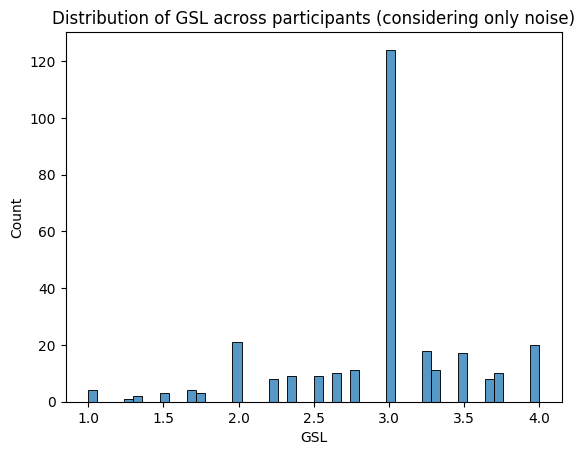

In [92]:
sns.histplot(data=agg, x='GSL', bins=50)
plt.title('Distribution of GSL across participants (considering only noise)')

In [93]:
# 1. Lower exposure to noise means higher GSL values
print(f"H0: Gen life satisfaction of people exposed to less noise <= Gen life satisfaction of people exposed to more noise")
print(f"HA: Gen life satisfaction of people exposed to less noise > Gen life satisfaction of people exposed to more noise")

low_qty = agg[agg['mean_decibel'] > 60]['GSL']
low_sample = low_qty.sample(n=50, random_state=32).reset_index(drop=True)
high_qty = agg[agg['mean_decibel'] <= 60]['GSL']
high_sample = high_qty.sample(n=50, random_state=36).reset_index(drop=True)

t1, p1 = stats.ttest_ind(high_sample, low_sample, alternative='greater', equal_var=False)
print(f"{t1: .3f}\n{p1: .3f}")
if(p1 < 0.05):
    print(f"Reject H0: Decrease in noise does increase gen life satisfaction")
else:
    print(f"Fail to Reject H0: Decreased Noise exposure doesn't necessarily increase gen life satifaction")

H0: Gen life satisfaction of people exposed to less noise <= Gen life satisfaction of people exposed to more noise
HA: Gen life satisfaction of people exposed to less noise > Gen life satisfaction of people exposed to more noise
-0.345
 0.634
Fail to Reject H0: Decreased Noise exposure doesn't necessarily increase gen life satifaction


## (Social relations, Loneliness, General Life Satisfaction) - Aditya Prashanth

In [94]:
# Aggregating social quality and quantity on basis of participants and week
weekly_agg_daily = daily_survey.groupby(['participant', 'week']).agg({'social_qty_vals': 'mean',
                                                                     'social_quality': 'mean'}).reset_index()

In [95]:
weekly_agg_daily

,participant,week,social_qty_vals,social_quality
0,AMdzA,28,1.647059,-0.647059
1,AMdzA,29,1.904762,7.095238
2,AMdzA,30,2.421053,14.894737
3,AMdzA,31,3.050000,20.050000
4,AMdzA,32,2.000000,0.000000
...,...,...,...,...
1784,rmWtX,31,2.000000,3.000000
1785,rsgrE,28,3.428571,14.428571
1786,rsgrE,29,1.125000,8.000000
1787,rsgrE,30,0.666667,2.833333


In [96]:
# Merging daily aggregated data on weely basis with weekly_survey
merged = pd.merge(weekly_survey, weekly_agg_daily, on=['participant', 'week'], how='inner')

In [97]:
merged.drop('timestamp', axis=1, inplace=True)

In [98]:
merged

,participant,GSL,TILS_sum,week,social_qty_vals,social_quality
0,AMdzA,3,3,28,1.647059,-0.647059
1,AMdzA,3,4,29,1.904762,7.095238
2,AMdzA,3,3,30,2.421053,14.894737
3,AMdzA,3,6,31,3.050000,20.050000
4,ASTAT,3,3,28,4.800000,39.866667
...,...,...,...,...,...,...
1069,raCsm,3,5,29,3.562500,29.312500
1070,raCsm,2,6,30,3.157895,9.947368
1071,raCsm,3,6,31,2.944444,9.944444
1072,rgbxB,3,4,30,6.000000,28.333333


In [99]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   participant      1074 non-null   object 
 1   GSL              1074 non-null   int64  
 2   TILS_sum         1074 non-null   int64  
 3   week             1074 non-null   UInt32 
 4   social_qty_vals  1074 non-null   float64
 5   social_quality   1074 non-null   float64
dtypes: UInt32(1), float64(2), int64(2), object(1)
memory usage: 47.3+ KB


In [100]:
agg = merged.groupby('participant').agg({
    'social_qty_vals': 'mean',
    'social_quality': "mean",
    'TILS_sum': 'mean',
    'GSL': 'mean'
}).reset_index()
agg

,participant,social_qty_vals,social_quality,TILS_sum,GSL
0,AMdzA,2.255718,10.348229,4.000000,3.000000
1,ASTAT,4.753774,35.244899,3.250000,3.500000
2,AWtpE,1.931944,26.534722,4.000000,2.666667
3,AYTpR,5.481096,26.444506,3.000000,3.500000
4,AZpyK,3.972970,43.301816,3.000000,3.000000
...,...,...,...,...,...
332,rDzfQ,4.001754,26.859649,3.500000,2.500000
333,rPDMX,5.550000,20.183333,4.666667,2.666667
334,raCsm,3.291210,17.701078,6.000000,2.500000
335,rgbxB,6.000000,28.333333,4.000000,3.000000


## Visualization of Distribution and Trends

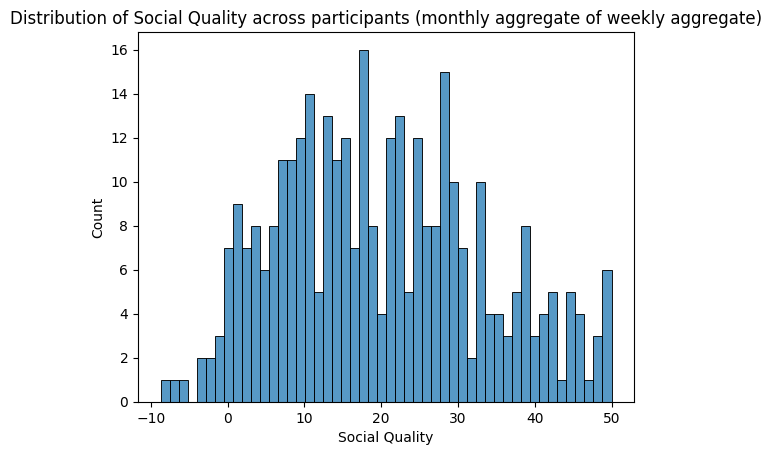

In [101]:
sns.histplot(data=agg, x='social_quality', bins=50)
plt.xlabel("Social Quality")
plt.title("Distribution of Social Quality across participants (monthly aggregate of weekly aggregate)")
plt.show()

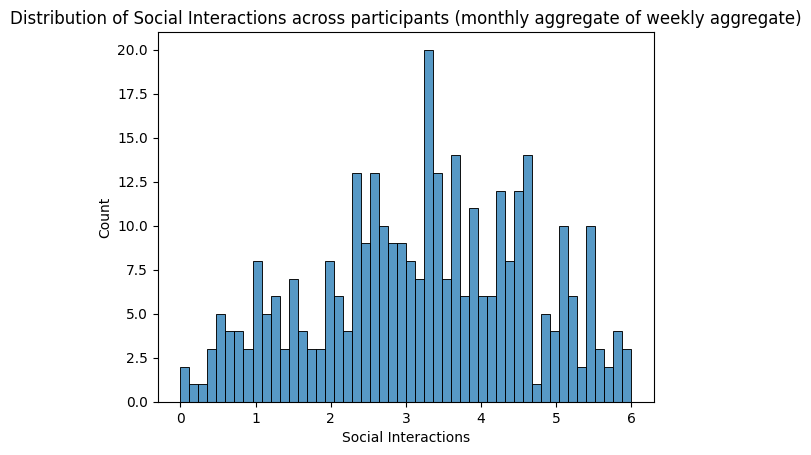

In [102]:
sns.histplot(data=agg, x='social_qty_vals', bins=50)
plt.xlabel("Social Interactions")
plt.title("Distribution of Social Interactions across participants (monthly aggregate of weekly aggregate)")
plt.show()

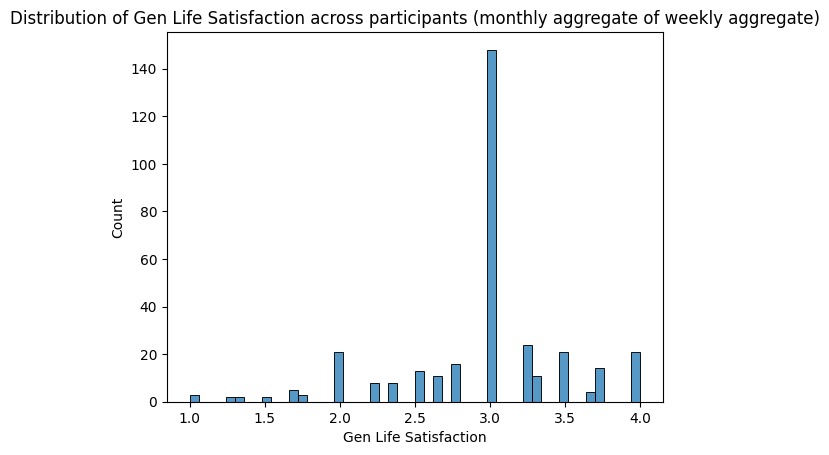

In [103]:
sns.histplot(data=agg, x='GSL', bins=50)
plt.xlabel("Gen Life Satisfaction")
plt.title("Distribution of Gen Life Satisfaction across participants (monthly aggregate of weekly aggregate)")
plt.show()

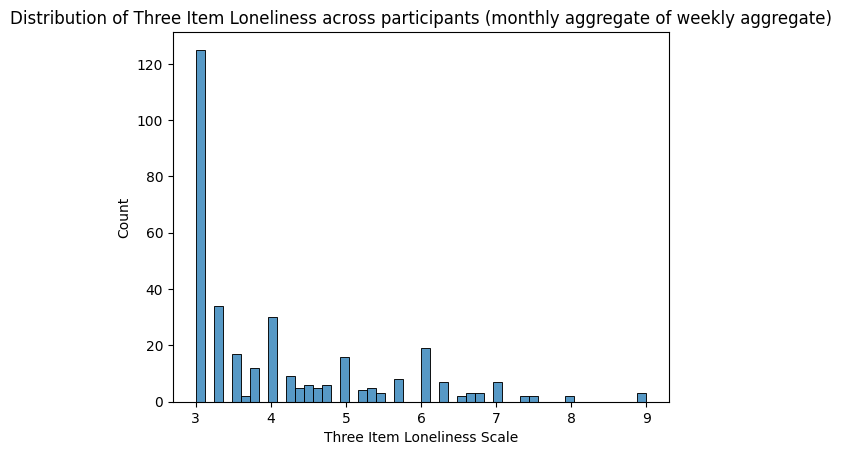

In [104]:
sns.histplot(data=agg, x='TILS_sum', bins=50)
plt.xlabel("Three Item Loneliness Scale")
plt.title("Distribution of Three Item Loneliness across participants (monthly aggregate of weekly aggregate)")
plt.show()

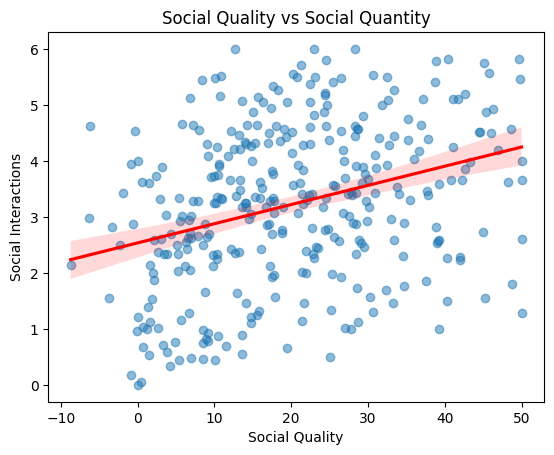

In [105]:
sns.regplot(data=agg, x='social_quality', y='social_qty_vals',
            order=1, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel("Social Quality")
plt.ylabel("Social Interactions")
plt.title('Social Quality vs Social Quantity')
plt.show()

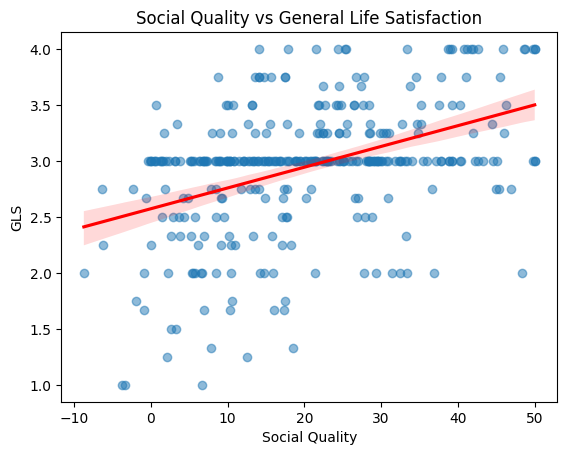

In [106]:
sns.regplot(data=agg, x='social_quality', y='GSL',
            order=1, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel("Social Quality")
plt.ylabel("GLS")
plt.title('Social Quality vs General Life Satisfaction')
plt.show()

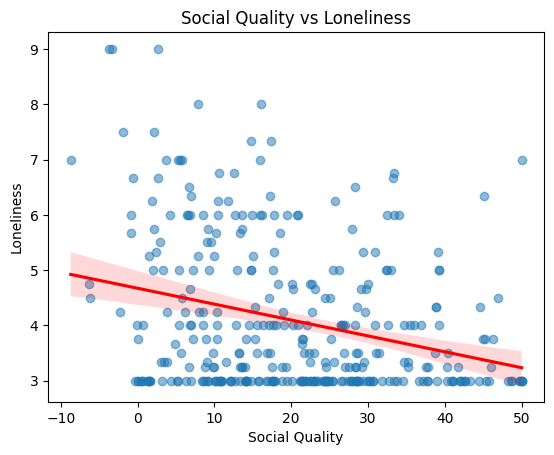

In [107]:
sns.regplot(data=agg, x='social_quality', y='TILS_sum',
            order=1, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel("Social Quality")
plt.ylabel("Loneliness")
plt.title('Social Quality vs Loneliness')
plt.show()

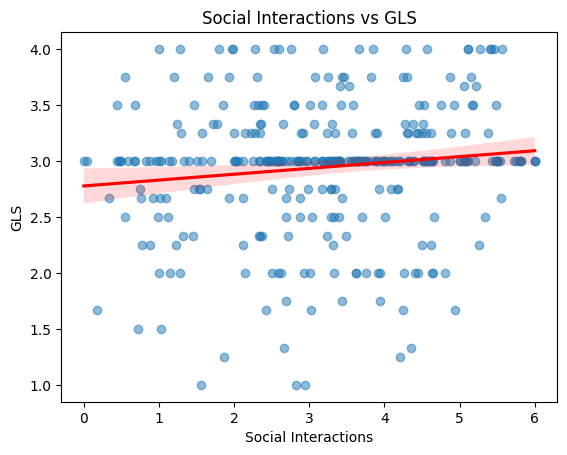

In [108]:
sns.regplot(data=agg, x='social_qty_vals', y='GSL',
            order=1, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel("Social Interactions")
plt.ylabel("GLS")
plt.title('Social Interactions vs GLS')
plt.show()

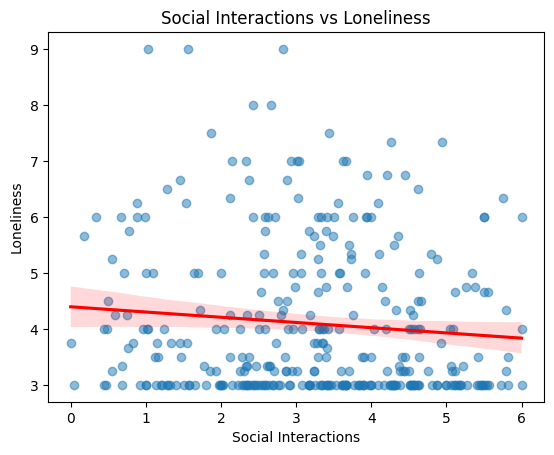

In [109]:
sns.regplot(data=agg, x='social_qty_vals', y='TILS_sum',
            order=1, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel("Social Interactions")
plt.ylabel("Loneliness")
plt.title('Social Interactions vs Loneliness')
plt.show()

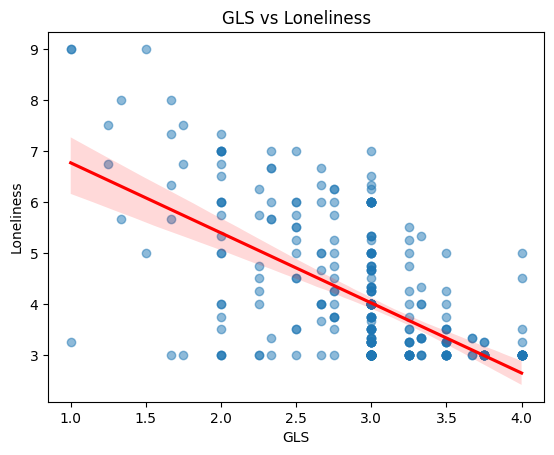

In [110]:
sns.regplot(data=agg, x='GSL', y='TILS_sum',
            order=1, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel("GLS")
plt.ylabel("Loneliness")
plt.title('GLS vs Loneliness')
plt.show()

## T-Tests

In [111]:
# 1. Social Quality increases with respect to social quanitity(i.e., number of interactions)
print(f"H0: Social Quality of People who had more interactions <= Social Quality of People who had lesser interactions")
print(f"HA: Social Quality of People who had more interaction > Social Quality of People who had lesser interactions")

low_qty = agg[agg['social_qty_vals'] <= 2]['social_quality']
low_sample = low_qty.sample(n=50, random_state=32).reset_index(drop=True)
high_qty = agg[agg['social_qty_vals'] > 2]['social_quality']
high_sample = high_qty.sample(n=50, random_state=36).reset_index(drop=True)

t1, p1 = stats.ttest_ind(high_sample, low_sample, alternative='greater', equal_var=False)
print(f"{t1: .3f}\n{p1: .3f}")
if(p1 < 0.05):
    print(f"Reject H0: Increase in social quantity does increase social quality")
else:
    print(f"Fail to Reject H0: Increase in social quantity doesn't necessarily increase social quality")

H0: Social Quality of People who had more interactions <= Social Quality of People who had lesser interactions
HA: Social Quality of People who had more interaction > Social Quality of People who had lesser interactions
 2.060
 0.021
Reject H0: Increase in social quantity does increase social quality


In [112]:
# 2. Loneliness reduces with increased social interactions
print(f"H0: Loneliness of people with more social interactions >= Loneliness of people with less social interactions")
print(f"HA: Loneliness of people with more social interactions < Loneliness of people with less social interactions")

low_qty = agg[agg['social_qty_vals'] <= 2]['TILS_sum']
high_qty = agg[agg['social_qty_vals'] > 2]['TILS_sum']
low_sample = low_qty.sample(n=45, random_state=12).reset_index(drop=True)
high_sample = high_qty.sample(n=45, random_state=90).reset_index(drop=True)

t1, p1 = stats.ttest_ind(high_sample, low_sample, alternative='less', equal_var=False)
print(f"{t1: .3f}\n{p1: .3f}")
if(p1 < 0.05):
    print(f"Reject H0: Loneliness of people with higher social interactions is lesser than those with less social interactions")
else:
    print(f"Fail to Reject H0: Lonesliness doesn't necessarily decrease with increased social interactions")

H0: Loneliness of people with more social interactions >= Loneliness of people with less social interactions
HA: Loneliness of people with more social interactions < Loneliness of people with less social interactions
 1.289
 0.900
Fail to Reject H0: Lonesliness doesn't necessarily decrease with increased social interactions


In [113]:
# 3. Gen Life Satisfaction increases with increased social interactions
print(f"H0: Gen Life Satisfaction of people who had more interactions <= Gen Life Satisfaction of people who had lesser interactions")
print(f"HA: Gen Life Satisfaction of people who had more interactions > Gen Life Satisfaction of people who had lesser interactions")

low_qty = agg[agg['social_qty_vals'] <= 2]['GSL']
high_qty = agg[agg['social_qty_vals'] > 2]['GSL']
low_sample = low_qty.sample(n=55, random_state=15).reset_index(drop=True)
high_sample = high_qty.sample(n=55, random_state=20).reset_index(drop=True)

t1, p1 = stats.ttest_ind(high_sample, low_sample, alternative='greater', equal_var=False)
print(f"{t1: .3f}\n{p1: .3f}")
if(p1 < 0.05):
    print(f"Reject H0: Increase in social interactions increases GLS")
else:
    print(f"Fail to Reject H0: Increase in social interactions doesn't necessarily increase GLS")

H0: Gen Life Satisfaction of people who had more interactions <= Gen Life Satisfaction of people who had lesser interactions
HA: Gen Life Satisfaction of people who had more interactions > Gen Life Satisfaction of people who had lesser interactions
 0.737
 0.231
Fail to Reject H0: Increase in social interactions doesn't necessarily increase GLS


In [114]:
# 4. Increase in Social quality implies reduced loneliness
print(f"H0: Loneliness of people with higher social quality >= Loneliness of people with lesser social quality")
print(f"HA: Loneliness of people with higher social quality < Loneliness of people with lesser social quality")

low_qty = agg[agg['social_quality'] <= 2]['TILS_sum']
high_qty = agg[agg['social_quality'] > 2]['TILS_sum']
low_sample = low_qty.sample(n=20, random_state=55).reset_index(drop=True)
high_sample = high_qty.sample(n=20, random_state=67).reset_index(drop=True)

t1, p1 = stats.ttest_ind(high_sample, low_sample, alternative='less', equal_var=False)
print(f"{t1: .3f}\n{p1: .3f}")
if(p1 < 0.05):
    print(f"Reject H0: Loneliness of people with higher social quality is lesser than those with less social quality")
else:
    print(f"Fail to Reject H0: Lonesliness doesn't necessarily decrease with increased social quality")

H0: Loneliness of people with higher social quality >= Loneliness of people with lesser social quality
HA: Loneliness of people with higher social quality < Loneliness of people with lesser social quality
-2.112
 0.021
Reject H0: Loneliness of people with higher social quality is lesser than those with less social quality


In [115]:
# 5. Increase in Social quality implies increased GLS
print(f"H0: Gen Life Satisfaction of people who had higher social quality <= Gen Life Satisfaction of people who had lesser quality")
print(f"HA: Gen Life Satisfaction of people who had more social quality > Gen Life Satisfaction of people who had lesser quality")

low_qty = agg[agg['social_quality'] <= 2]['GSL']
high_qty = agg[agg['social_quality'] > 2]['GSL']
low_sample = low_qty.sample(n=23, random_state=43).reset_index(drop=True)
high_sample = high_qty.sample(n=23, random_state=33).reset_index(drop=True)

t1, p1 = stats.ttest_ind(high_sample, low_sample, alternative='greater', equal_var=False)
print(f"{t1: .3f}\n{p1: .3f}")
if(p1 < 0.05):
    print(f"Reject H0: GLS of people with higher social quality is higher than those with less social quality")
else:
    print(f"Fail to Reject H0: GLS doesn't necessarily increase with increased social quality")

H0: Gen Life Satisfaction of people who had higher social quality <= Gen Life Satisfaction of people who had lesser quality
HA: Gen Life Satisfaction of people who had more social quality > Gen Life Satisfaction of people who had lesser quality
 0.139
 0.445
Fail to Reject H0: GLS doesn't necessarily increase with increased social quality


In [116]:
# 6. Reduced Loneliness implies increase general life satisfaction
print(f"H0: GLS of people with lesser loneliness <= GLS of people with higher loneliness")
print(f"HA: GLS of people with lesser loneliness > GLS of people with higher loneliness")

low_qty = agg[agg['TILS_sum'] < 6]['GSL']
high_qty = agg[agg['TILS_sum'] >= 6]['GSL']
low_sample = low_qty.sample(n=45, random_state=48).reset_index(drop=True)
high_sample = high_qty.sample(n=45, random_state=37).reset_index(drop=True)

t1, p1 = stats.ttest_ind(low_qty, high_qty, alternative='greater', equal_var=False)
print(f"{t1: .3f}\n{p1: .3f}")
if(p1 < 0.05):
    print(f"Reject H0: GLS of people with lesser loneliness is greater than those with higher loneslines")
else:
    print(f"Fail to Reject H0: GLS doesn't necessarily increase with reduced loneliness")

H0: GLS of people with lesser loneliness <= GLS of people with higher loneliness
HA: GLS of people with lesser loneliness > GLS of people with higher loneliness
 7.984
 0.000
Reject H0: GLS of people with lesser loneliness is greater than those with higher loneslines


In [117]:
del low_qty, high_qty, agg, merged, weekly_agg_daily, daily_survey, weekly_survey, light_weekly, noise_weekly

## (Physical Activity, Life Satisfaction with Physical Health) - Chetanya

In [118]:
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind

In [119]:
weekly_survey = pd.read_csv(f"{file_loc}weekly_survey.csv")
weekly_survey

,participant,timestamp,health,physical_activity,TILS_1,TILS_2,TILS_3,GSL,RELAT_LS,WORK_LS,...,LS_questionnaire_start_timestamp,GSL_answer_timestamp,RELAT_LS_answer_timestamp,WORK_LS_answer_timestamp,FINAN_LS_answer_timestamp,TIME_LS_answer_timestamp,PHYS_LS_answer_timestamp,MENT_LS_answer_timestamp,AREA_LS_answer_timestamp,timestamp_UTC
0,AMdzA,2023-07-14 18:13:56.325378,good,4-6,1,1,1,3,3,3,...,2023-07-14 18:13:33.337415,2023-07-14 18:13:36.426144,2023-07-14 18:13:38.220378,2023-07-14 18:13:39.877151,2023-07-14 18:13:41.086108,2023-07-14 18:13:42.276108,2023-07-14 18:13:43.442794,2023-07-14 18:13:46.001410,2023-07-14 18:13:55.671045,1.689351e+09
1,AMdzA,2023-07-21 18:36:44.500888,average,2-4,1,1,2,3,3,3,...,2023-07-21 18:36:22.498511,2023-07-21 18:36:26.771177,2023-07-21 18:36:30.885939,2023-07-21 18:36:32.951297,2023-07-21 18:36:34.467258,2023-07-21 18:36:38.032074,2023-07-21 18:36:40.089914,2023-07-21 18:36:41.413901,2023-07-21 18:36:43.380462,1.689957e+09
2,AMdzA,2023-07-28 18:06:02.695196,good,2-4,1,1,1,3,3,3,...,2023-07-28 18:05:44.527749,2023-07-28 18:05:47.944449,2023-07-28 18:05:49.760616,2023-07-28 18:05:50.950229,2023-07-28 18:05:52.226086,2023-07-28 18:05:55.380653,2023-07-28 18:05:57.179513,2023-07-28 18:05:59.758403,2023-07-28 18:06:01.660400,1.690560e+09
3,AMdzA,2023-08-04 20:13:30.889408,good,4-6,2,2,2,3,3,3,...,2023-08-04 20:13:21.486518,2023-08-04 20:13:22.936974,2023-08-04 20:13:24.235056,2023-08-04 20:13:25.217003,2023-08-04 20:13:26.215915,2023-08-04 20:13:27.156646,2023-08-04 20:13:28.097279,2023-08-04 20:13:29.012215,2023-08-04 20:13:30.077153,1.691173e+09
4,ASTAT,2023-07-14 18:09:14.872259,excellent,4-6,1,1,1,3,4,3,...,2023-07-14 18:08:53.608367,2023-07-14 18:08:56.287203,2023-07-14 18:09:02.829701,2023-07-14 18:09:06.233196,2023-07-14 18:09:08.856177,2023-07-14 18:09:10.356432,2023-07-14 18:09:11.653088,2023-07-14 18:09:13.032075,2023-07-14 18:09:14.382855,1.689351e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069,raCsm,2023-07-21 18:10:48.825826,very good,4-6,2,2,1,3,4,2,...,2023-07-21 18:10:13.829460,2023-07-21 18:10:29.914699,2023-07-21 18:10:31.652304,2023-07-21 18:10:33.549064,2023-07-21 18:10:35.129985,2023-07-21 18:10:36.760176,2023-07-21 18:10:40.877819,2023-07-21 18:10:46.493705,2023-07-21 18:10:48.342645,1.689956e+09
1070,raCsm,2023-07-28 18:40:52.238470,average,2-4,2,2,2,2,2,2,...,2023-07-28 18:40:34.663091,2023-07-28 18:40:37.184884,2023-07-28 18:40:40.298934,2023-07-28 18:40:41.747073,2023-07-28 18:40:43.519911,2023-07-28 18:40:45.715127,2023-07-28 18:40:47.703810,2023-07-28 18:40:49.543598,2023-07-28 18:40:51.610812,1.690562e+09
1071,raCsm,2023-08-04 19:17:57.074465,good,4-6,2,2,2,3,3,2,...,2023-08-04 19:17:38.173950,2023-08-04 19:17:40.173976,2023-08-04 19:17:44.194637,2023-08-04 19:17:46.329162,2023-08-04 19:17:48.292726,2023-08-04 19:17:49.890486,2023-08-04 19:17:52.022374,2023-08-04 19:17:53.932965,2023-08-04 19:17:56.577614,1.691169e+09
1072,rgbxB,2023-07-28 22:49:11.015715,good,6-8,2,1,1,3,4,3,...,2023-07-28 22:48:32.855448,2023-07-28 22:48:38.334971,2023-07-28 22:48:45.798439,2023-07-28 22:48:50.343641,2023-07-28 22:48:54.149860,2023-07-28 22:48:59.304792,2023-07-28 22:49:01.985909,2023-07-28 22:49:04.569667,2023-07-28 22:49:09.214705,1.690577e+09


In [120]:
weekly_survey.dtypes

participant                              object
timestamp                                object
health                                   object
physical_activity                        object
TILS_1                                    int64
TILS_2                                    int64
TILS_3                                    int64
GSL                                       int64
RELAT_LS                                  int64
WORK_LS                                   int64
FINAN_LS                                  int64
TIME_LS                                   int64
PHYS_LS                                   int64
MENT_LS                                   int64
AREA_LS                                   int64
survey_start_timestamp                   object
survey_end_timestamp                     object
health_questionnaire_start_timestamp     object
health_answer_timestamp                  object
physical_activity_answer_timestamp       object
TILS_questionnaire_start_timestamp      

In [121]:
# converting the timestamp column to date time format
weekly_survey['timestamp'] = pd.to_datetime(weekly_survey['timestamp'])

In [122]:
# creating a new column that specifies the week number of the survey
weekly_survey["week"] = weekly_survey["timestamp"].dt.isocalendar().week

In [123]:
# checking the different unique values present in the physical_activity column
weekly_survey['physical_activity'].value_counts()

physical_activity
0-2    361
2-4    317
4-6    205
8+     109
6-8     82
Name: count, dtype: int64

In [124]:
# using mid-point of each range to make physical_activity a numeric column
mapping = {
    "0-2": 1,
    "2-4": 3,
    "4-6": 5,
    "6-8": 7,
    "8+": 9
}

weekly_survey["physical_activity"] = weekly_survey["physical_activity"].map(mapping)

In [125]:
weekly_survey['physical_activity'].value_counts()

physical_activity
1    361
3    317
5    205
9    109
7     82
Name: count, dtype: int64

In [126]:
weekly = (
    weekly_survey.groupby(["participant", "week"])["physical_activity"]
      .mean()
      .reset_index()
)

In [127]:
weekly_survey['PHYS_LS'].value_counts()

PHYS_LS
3    645
2    216
4    165
1     48
Name: count, dtype: int64

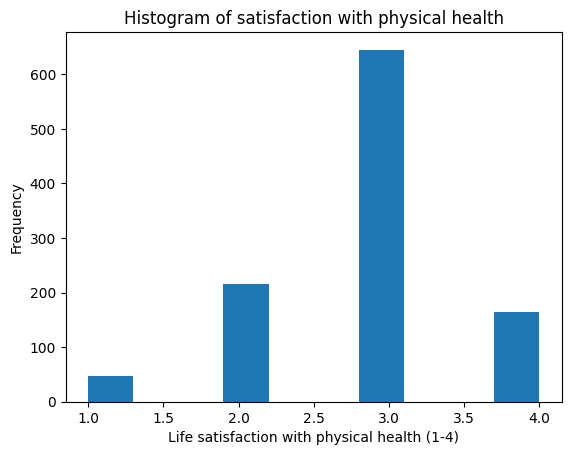

In [128]:
plt.hist(weekly_survey['PHYS_LS'])
plt.title("Histogram of satisfaction with physical health")
plt.xlabel("Life satisfaction with physical health (1-4)")
plt.ylabel("Frequency")
plt.show()

### Test-1

#### H0: higher physical activity has no impact on life satisfaction with physical health
#### H1: higher physical activity has a significant impact on participant's life satisfaction with physical health

In [129]:
# Extracting the satisfaction rating of physical heath of 50 random people having 5 hours of physical activity in the week
filtered_df5 = weekly_survey[weekly_survey['physical_activity'] == 5]
sample1 = filtered_df5['PHYS_LS'].sample(50, random_state=38).reset_index(drop=True)
print(f"Mean of sample 1: {sample1.mean()}")

Mean of sample 1: 3.0


In [130]:
# Extracting the satisfaction rating of physical heath of 50 random people having 9 hours of physical activity in the week
filtered_df9 = weekly_survey[weekly_survey['physical_activity'] == 9]
sample2 = filtered_df9['PHYS_LS'].sample(50, random_state = 44).reset_index(drop=True)
print(f"Mean of sample 2: {sample2.mean()}")

Mean of sample 2: 3.28


In [131]:
t, p = ttest_ind(sample1, sample2, equal_var=False)

print(f"T-statistic: {t:.3f}")
print(f"P-value: {p:.5f}")

T-statistic: -2.087
P-value: 0.03946


The above independent two-sample t-test was performed to compare life satisfaction with physical health (PHYS_LS) between individuals doing 5 hours and 9 hours of weekly physical activity.

Mean(5 hrs) = 3.0,  Mean(9 hrs) = 3.28


Since p < 0.05, the difference is statistically significant.

We reject the null hypothesis.
Therefore, individuals with higher physical activity report higher life satisfaction with physical health.

### Test-2

#### H0: higher physical activity has no impact on life satisfaction with physical health
#### H1: higher physical activity has a significant impact on participant's life satisfaction with physical health

In [132]:
# Extracting the satisfaction rating of physical heath of 100 random participants having 1 hour of physical activity in the week
filtered_df1 = weekly_survey[weekly_survey['physical_activity'] == 1]
sample3 = filtered_df1['PHYS_LS'].sample(100, random_state=38).reset_index(drop=True)
print(f"Mean of sample 3: {sample3.mean()}")

Mean of sample 3: 2.68


In [133]:
# Extracting the satisfaction rating of physical heath of 100 random participants having 5 hours of physical activity in the week
sample4 = filtered_df5['PHYS_LS'].sample(100, random_state=38).reset_index(drop=True)
print(f"Mean of sample 4: {sample4.mean()}")

Mean of sample 4: 3.02


In [134]:
t, p = ttest_ind(sample3, sample4, equal_var=False)

print(f"T-statistic: {t:.3f}")
print(f"P-value: {p:.5f}")

T-statistic: -3.612
P-value: 0.00039


The above independent two-sample t-test was performed to compare life satisfaction with physical health (PHYS_LS) between individuals doing 1 hour and 5 hours of weekly physical activity.

Mean(1 hr) = 2.68,  Mean(5 hrs) = 3.02

Since p < 0.05, the difference is statistically significant.

We reject the null hypothesis.
Therefore, individuals with higher physical activity report higher life satisfaction with physical health.

### Test-3

#### H0: higher physical activity has no impact on life satisfaction with physical health
#### H1: higher physical activity has a significant impact on participant's life satisfaction with physical health

In [135]:
# Extracting the satisfaction rating of physical heath of 80 random participants having 3 hours of physical activity in the week
filtered_df3 = weekly_survey[weekly_survey['physical_activity'] == 3]
sample5 = filtered_df3['PHYS_LS'].sample(80, random_state=38).reset_index(drop=True)
print(f"Mean of sample 5: {sample5.mean()}")

Mean of sample 5: 2.9125


In [136]:
# Extracting the satisfaction rating of physical heath of 80 random participants having 7 hours of physical activity in the week
filtered_df7 = weekly_survey[weekly_survey['physical_activity'] == 7]
sample6 = filtered_df7['PHYS_LS'].sample(80, random_state=38).reset_index(drop=True)
print(f"Mean of sample 6: {sample6.mean()}")

Mean of sample 6: 3.125


In [137]:
t, p = ttest_ind(sample5, sample6, equal_var=False)

print(f"T-statistic: {t:.3f}")
print(f"P-value: {p:.5f}")

T-statistic: -1.975
P-value: 0.04997


The above independent two-sample t-test was performed to compare life satisfaction with physical health (PHYS_LS) between individuals doing 1 hour and 5 hours of weekly physical activity.

Mean(1 hr) = 2.9125,  Mean(5 hrs) = 3.125

Since p < 0.05, the difference is statistically significant.

We reject the null hypothesis.
Therefore, individuals with higher physical activity report higher life satisfaction with physical health.

In [138]:
del weekly_survey, filtered_df5, filtered_df9, filtered_df3, filtered_df7, filtered_df1, sample1, sample2, sample3, sample4, sample5, sample6

## (Employment Type, General Life Satisfaction, Work Satisfaction) - Aryaan

In [139]:
from itertools import combinations

In [140]:
df = pd.read_csv(f"{file_loc}initial_survey.csv")

print("✅ Data Loaded Successfully!")
display(df.head())
print(df.shape)

✅ Data Loaded Successfully!


,participant,timestamp,gender,birth_year,postcode,income,health,covid_physical_health,covid_mental_health,physical_activity,...,AAQ_5_answer_timestamp,AAQ_6_answer_timestamp,AAQ_7_answer_timestamp,TILS_questionnaire_start_timestamp,TILS_1_answer_timestamp,TILS_2_answer_timestamp,TILS_3_answer_timestamp,economic_inequality_questionnaire_start_timestamp,economic_inequality_answer_timestamp,timestamp_UTC
0,AMdzA,2023-07-03 16:43:08.413121,female,1978,1002.0,20200-35200,good,negative,negative,2-4,...,2023-07-03 16:42:26.276950,2023-07-03 16:42:30.696134,2023-07-03 16:42:35.178943,2023-07-03 16:42:36.946287,2023-07-03 16:42:46.373384,2023-07-03 16:42:49.175986,2023-07-03 16:42:51.933939,2023-07-03 16:43:08.389697,2023-07-03 16:43:01.402832,1.688395e+09
1,ASTAT,2023-07-06 16:41:19.031818,male,1997,3015.0,20200-35200,very good,none,negative,4-6,...,2023-07-06 16:40:21.413334,2023-07-06 16:40:26.979474,2023-07-06 16:40:47.413806,2023-07-06 16:40:49.218279,2023-07-06 16:40:56.696645,2023-07-06 16:41:01.338248,2023-07-06 16:41:03.820702,2023-07-06 16:41:18.993925,2023-07-06 16:41:13.369181,1.688654e+09
2,AWtpE,2023-07-04 23:10:04.567328,female,1963,3001.0,12450-20200,good,none,negative,4-6,...,2023-07-04 23:09:25.099064,2023-07-04 23:09:28.342543,2023-07-04 23:09:32.741500,2023-07-04 23:09:33.800162,2023-07-04 23:09:38.315074,2023-07-04 23:09:43.383809,2023-07-04 23:09:46.824502,2023-07-04 23:10:04.515681,2023-07-04 23:09:55.644583,1.688505e+09
3,AYTpR,2023-07-05 08:07:46.272709,female,1976,3540.0,0-12450,very good,none,positive,8+,...,2023-07-05 08:06:30.354217,2023-07-05 08:06:40.805355,2023-07-05 08:06:51.712291,2023-07-05 08:06:54.458042,2023-07-05 08:07:04.093105,2023-07-05 08:07:10.090262,2023-07-05 08:07:15.998060,2023-07-05 08:07:46.242967,2023-07-05 08:07:33.438770,1.688537e+09
4,AZpyK,2023-07-03 14:56:34.514781,female,1969,3001.0,20200-35200,very good,none,none,8+,...,2023-07-03 14:55:16.800856,2023-07-03 14:55:22.585508,2023-07-03 14:55:29.636014,2023-07-03 14:55:31.658609,2023-07-03 14:55:40.067168,2023-07-03 14:55:46.151590,2023-07-03 14:55:49.669644,2023-07-03 14:56:34.494006,2023-07-03 14:56:29.314698,1.688389e+09


(409, 161)


In [141]:
df = df.dropna(subset=['GSL', 'employment_type'])

# Convert GLS to numeric in case it's string
df['GSL'] = pd.to_numeric(df['GSL'], errors='coerce')
df = df.dropna(subset=['GSL'])

print("\n✅ Cleaned Data Shape:", df.shape)


✅ Cleaned Data Shape: (409, 161)


In [142]:
employment_types = df['employment_type'].unique()
print("\n Employment Types Found:", employment_types)


 Employment Types Found: ['onsite' 'none' 'remote' 'hybrid' 'other']


In [143]:
results = []

for groupA, groupB in combinations(employment_types, 2):
    gls_A = df[df['employment_type'] == groupA]['GSL']
    gls_B = df[df['employment_type'] == groupB]['GSL']
    
    # T-test with unequal variance assumption (Welch’s test)
    t_stat, p_val = stats.ttest_ind(gls_A, gls_B, equal_var=False)
    
    results.append({
        'Group 1': groupA,
        'Group 2': groupB,
        'n1': len(gls_A),
        'n2': len(gls_B),
        'T-Statistic': round(t_stat, 3),
        'P-Value': round(p_val, 5),# -----------------------------
# 📍 STEP 6: Show Final Results
# -----------------------------
        'Significant (p<0.05)': "✅ Yes" if p_val < 0.05 else "❌ No"
    })

In [144]:
results_df = pd.DataFrame(results)
print("\n📊 Pairwise T-Test Results for GLS Across Employment Types:")
display(results_df)


📊 Pairwise T-Test Results for GLS Across Employment Types:


,Group 1,Group 2,n1,n2,T-Statistic,P-Value,Significant (p<0.05)
0,onsite,none,228,74,-0.296,0.76774,❌ No
1,onsite,remote,228,28,-1.824,0.07698,❌ No
2,onsite,hybrid,228,70,-1.803,0.07348,❌ No
3,onsite,other,228,9,0.691,0.50797,❌ No
4,none,remote,74,28,-1.499,0.14063,❌ No
5,none,hybrid,74,70,-1.167,0.24520,❌ No
6,none,other,74,9,0.777,0.45570,❌ No
7,remote,hybrid,28,70,0.760,0.45164,❌ No
8,remote,other,28,9,1.567,0.14001,❌ No
9,hybrid,other,70,9,1.273,0.23407,❌ No


Conclusion for Pairwise T-Tests on General Life Satisfaction (GLS) Across Employment Types

The independent samples t-tests were conducted to compare the General Life Satisfaction (GLS) scores across all possible pairs of employment types. The analysis included comparisons between onsite, remote, hybrid, other, and none. For each pair of employment categories, Welch’s t-test was used to account for potential inequalities in variance and sample size differences.

The results of the pairwise t-tests show that none of the employment type comparisons produced a statistically significant difference in GLS at the 5% significance level (p < 0.05). This indicates that, based on the dataset used, General Life Satisfaction does not significantly vary with employment type.

In simpler terms, individuals working onsite, remotely, in a hybrid mode, unemployed, or in other forms of employment reported similar levels of life satisfaction, and the differences observed were not strong enough to be statistically meaningful.

Key Takeaways:

No pair of employment types showed a significant difference in GLS.

Employment mode does not appear to be a determining factor for general life satisfaction in this dataset.

Life satisfaction may be influenced more strongly by other factors (e.g., income, work-life balance, mental health, family/social support, job security), rather than where or how one works.

In [145]:
# Filter only remote vs onsite
ws_df = df[df['employment_type'].isin(['remote', 'onsite'])].dropna(subset=['WORK_LS'])

remote_ws = ws_df[ws_df['employment_type'] == 'remote']['WORK_LS']
onsite_ws = ws_df[ws_df['employment_type'] == 'onsite']['WORK_LS']


In [146]:
print("Sample sizes:")
print("Remote:", len(remote_ws))
print("Onsite:", len(onsite_ws))

Sample sizes:
Remote: 28
Onsite: 228


In [147]:
# Run Welch's t-test
t_stat, p_val = stats.ttest_ind(remote_ws, onsite_ws, equal_var=False)

print("\n📊 T-Test Results: Remote vs Onsite Work Satisfaction")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.5f}")

alpha = 0.05
if p_val < alpha:
    print("\n✅ Conclusion: There is a **significant difference** in work satisfaction between remote and onsite employees.")
else:
    print("\n❌ Conclusion: There is **no significant difference** in work satisfaction between remote and onsite employees.")


📊 T-Test Results: Remote vs Onsite Work Satisfaction
T-statistic: 0.951
P-value: 0.34770

❌ Conclusion: There is **no significant difference** in work satisfaction between remote and onsite employees.


A Welch’s independent samples t-test was conducted to compare Work Satisfaction between remote and onsite employees. The results indicated no statistically significant difference in Work Satisfaction levels between the two groups (p > 0.05). This suggests that, based on the available data, working remotely does not lead to a higher or lower level of work satisfaction compared to working onsite.

The boxplot also visually confirms this, as the distributions, medians, and interquartile ranges of the two groups appear similar. This implies that the working modality alone may not be a major determining factor of work satisfaction, and other variables such as job role, work environment, management, or personal preference could play a larger role.

In [148]:
del remote_ws, onsite_ws, ws_df, results_df, results, df, employment_types

## (Age, Physical Actiivty, Mental Life Satisfaction, Physical Life Satisfaction) - Soumik

In [149]:
df=pd.read_csv(f"{file_loc}initial_survey.csv")
df

,participant,timestamp,gender,birth_year,postcode,income,health,covid_physical_health,covid_mental_health,physical_activity,...,AAQ_5_answer_timestamp,AAQ_6_answer_timestamp,AAQ_7_answer_timestamp,TILS_questionnaire_start_timestamp,TILS_1_answer_timestamp,TILS_2_answer_timestamp,TILS_3_answer_timestamp,economic_inequality_questionnaire_start_timestamp,economic_inequality_answer_timestamp,timestamp_UTC
0,AMdzA,2023-07-03 16:43:08.413121,female,1978,1002.0,20200-35200,good,negative,negative,2-4,...,2023-07-03 16:42:26.276950,2023-07-03 16:42:30.696134,2023-07-03 16:42:35.178943,2023-07-03 16:42:36.946287,2023-07-03 16:42:46.373384,2023-07-03 16:42:49.175986,2023-07-03 16:42:51.933939,2023-07-03 16:43:08.389697,2023-07-03 16:43:01.402832,1.688395e+09
1,ASTAT,2023-07-06 16:41:19.031818,male,1997,3015.0,20200-35200,very good,none,negative,4-6,...,2023-07-06 16:40:21.413334,2023-07-06 16:40:26.979474,2023-07-06 16:40:47.413806,2023-07-06 16:40:49.218279,2023-07-06 16:40:56.696645,2023-07-06 16:41:01.338248,2023-07-06 16:41:03.820702,2023-07-06 16:41:18.993925,2023-07-06 16:41:13.369181,1.688654e+09
2,AWtpE,2023-07-04 23:10:04.567328,female,1963,3001.0,12450-20200,good,none,negative,4-6,...,2023-07-04 23:09:25.099064,2023-07-04 23:09:28.342543,2023-07-04 23:09:32.741500,2023-07-04 23:09:33.800162,2023-07-04 23:09:38.315074,2023-07-04 23:09:43.383809,2023-07-04 23:09:46.824502,2023-07-04 23:10:04.515681,2023-07-04 23:09:55.644583,1.688505e+09
3,AYTpR,2023-07-05 08:07:46.272709,female,1976,3540.0,0-12450,very good,none,positive,8+,...,2023-07-05 08:06:30.354217,2023-07-05 08:06:40.805355,2023-07-05 08:06:51.712291,2023-07-05 08:06:54.458042,2023-07-05 08:07:04.093105,2023-07-05 08:07:10.090262,2023-07-05 08:07:15.998060,2023-07-05 08:07:46.242967,2023-07-05 08:07:33.438770,1.688537e+09
4,AZpyK,2023-07-03 14:56:34.514781,female,1969,3001.0,20200-35200,very good,none,none,8+,...,2023-07-03 14:55:16.800856,2023-07-03 14:55:22.585508,2023-07-03 14:55:29.636014,2023-07-03 14:55:31.658609,2023-07-03 14:55:40.067168,2023-07-03 14:55:46.151590,2023-07-03 14:55:49.669644,2023-07-03 14:56:34.494006,2023-07-03 14:56:29.314698,1.688389e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,rbYQC,2023-07-06 16:11:43.231880,male,2002,46009.0,0-12450,excellent,positive,very negative,8+,...,2023-07-06 16:11:05.200875,2023-07-06 16:11:06.459936,2023-07-06 16:11:07.550569,2023-07-06 16:11:10.091459,2023-07-06 16:11:21.297572,2023-07-06 16:11:24.457022,2023-07-06 16:11:27.082380,2023-07-06 16:11:43.128359,2023-07-06 16:11:40.270750,1.688653e+09
405,rgbxB,2023-07-08 01:03:13.829745,female,1998,48014.0,0-12450,good,none,none,2-4,...,2023-07-08 01:02:17.883769,2023-07-08 01:02:26.862524,2023-07-08 01:02:31.838831,2023-07-08 01:02:35.100688,2023-07-08 01:02:45.073680,2023-07-08 01:02:47.589116,2023-07-08 01:02:51.371055,2023-07-08 01:03:13.782484,2023-07-08 01:03:04.086089,1.688771e+09
406,rmWtX,2023-07-06 09:58:23.241510,male,1998,48008.0,60000+,excellent,none,negative,4-6,...,2023-07-06 09:57:59.635802,2023-07-06 09:58:02.748144,2023-07-06 09:58:06.875780,2023-07-06 09:58:07.984516,2023-07-06 09:58:10.876787,2023-07-06 09:58:12.454864,2023-07-06 09:58:14.307941,2023-07-06 09:58:23.231306,2023-07-06 09:58:21.256063,1.688630e+09
407,rsDwF,2023-07-05 20:55:42.401573,female,1999,50010.0,35200-60000,good,negative,negative,4-6,...,2023-07-05 20:55:12.136755,2023-07-05 20:55:16.628434,2023-07-05 20:55:20.964307,2023-07-05 20:55:22.135084,2023-07-05 20:55:27.550959,2023-07-05 20:55:30.906179,2023-07-05 20:55:33.289042,2023-07-05 20:55:42.372351,2023-07-05 20:55:39.563725,1.688583e+09


In [150]:
data=df[['participant','gender','birth_year','physical_activity',
           'employment_type','GSL','PHYS_LS','MENT_LS','health']].copy()

In [151]:
#CONVERTING PHYSICAL ACTIVITY DATA TO NUMERIC VALUE
data['physical_activity']=data['physical_activity'].astype(str).str.strip()
data['physical_activity']=data['physical_activity'].replace({
    '0-2': 1,
    '2-4': 3,
    '4-6': 5,
    '6-8': 7,
    '8+': 9
})
data['physical_activity']=pd.to_numeric(data['physical_activity'],errors='coerce')
data['physical_activity']

C:\Users\adity\AppData\Local\Temp\ipykernel_28460\2662994201.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['physical_activity']=data['physical_activity'].replace({


0      3
1      5
2      5
3      9
4      9
      ..
404    9
405    3
406    5
407    5
408    7
Name: physical_activity, Length: 409, dtype: int64

In [152]:
#CONVERTING BIRTH YEAR, MENTAL SATISFACTION TO NUMERIC VALUE
data['birth_year'] = pd.to_numeric(data['birth_year'], errors='coerce')
data['MENT_LS'] = pd.to_numeric(data['MENT_LS'], errors='coerce')

In [153]:
#CALCULATING AGE BY BIRTH YEAR
data['age']=2025-data['birth_year']

In [154]:
data

,participant,gender,birth_year,physical_activity,employment_type,GSL,PHYS_LS,MENT_LS,health,age
0,AMdzA,female,1978,3,onsite,3,3,2,good,47
1,ASTAT,male,1997,5,onsite,4,4,3,very good,28
2,AWtpE,female,1963,5,onsite,3,3,2,good,62
3,AYTpR,female,1976,9,none,4,3,4,very good,49
4,AZpyK,female,1969,9,none,3,2,4,very good,56
...,...,...,...,...,...,...,...,...,...,...
404,rbYQC,male,2002,9,onsite,4,4,3,excellent,23
405,rgbxB,female,1998,3,onsite,3,3,3,good,27
406,rmWtX,male,1998,5,hybrid,3,4,3,excellent,27
407,rsDwF,female,1999,5,onsite,2,3,3,good,26


### T-Test 1: Physical Activity vs Mental Satisfaction

Null Hypothesis (H0):
There is no significant difference in mental satisfaction between participants with high and low physical activity levels.

Alternate Hypothesis (H1):
There is a significant difference in mental satisfaction between participants with high and low physical activity levels.

In [155]:
median_activity = data['physical_activity'].median()
high=data[data['physical_activity']>median_activity]['MENT_LS']
low =data[data['physical_activity']<=median_activity]['MENT_LS']

In [156]:
t1,p1=ttest_ind(high,low,nan_policy='omit')
print("T-Test 1 : High vs Low Physical Activity on Mental Satisfaction")
print("T =",round(t1,3),"p =",round(p1,5))
if p1<0.05:
    print("Reject H0: Significant difference found.\n")
else:
    print("Fail to reject H0: No significant difference found.\n")

T-Test 1 : High vs Low Physical Activity on Mental Satisfaction
T = 3.103 p = 0.00205
Reject H0: Significant difference found.



### T-Test 2: Age vs Mental Satisfaction

Null Hypothesis (H0): The mean mental satisfaction is the same for young and old participants.

Alternate Hypothesis (H1): The mean mental satisfaction differs between young and old participants

In [157]:
median_age=data['age'].median()
young=data[data['age']<=median_age]['MENT_LS']
old=data[data['age']>median_age]['MENT_LS']

t2,p2=ttest_ind(young, old, nan_policy='omit')
print("T-Test 2 : Young vs Old on Mental Satisfaction")
print("T =",round(t2,3)," p =",round(p2,5))
if p2<0.05:
    print("Reject H0: Significant difference found.\n")
else:
    print("Fail to reject H0: No significant difference found.\n")

T-Test 2 : Young vs Old on Mental Satisfaction
T = -1.995  p = 0.04668
Reject H0: Significant difference found.



In [158]:
#T-TEST SUMMARY TABLE
t_test_results = pd.DataFrame({
    "Variable": ["Mental Satisfaction", "Mental Satisfaction"],
    "Comparison": ["High vs Low Physical Activity", "Young vs Old"],
    "n": [len(data['MENT_LS'].dropna())]*2,
    "t": [round(t1,3),round(t2, 3)],
    "p": [round(p1,5),round(p2, 5)]
})

print("\nT-test Results:")
display(t_test_results)


T-test Results:


,Variable,Comparison,n,t,p
0,Mental Satisfaction,High vs Low Physical Activity,409,3.103,0.00205
1,Mental Satisfaction,Young vs Old,409,-1.995,0.04668


### T-Test Result Interpretation

Based on the independent t-test results:

Physical Activity
A significant difference was found between participants with high and low physical activity levels (p=0.002).
Individuals engaging in higher physical activity reported greater mental satisfaction, indicating lower stress levels.
This suggests that regular physical activity contributes positively to mental well-being and stress reduction.

Age
A significant difference was also observed between young and old participants (p=0.047).
Older participants reported higher mental satisfaction than younger participants.
This implies that mental stability and stress management may improve with age and life experience.

### Conclusion:
From the above two t-tests, we can conclude that mental satisfaction significantly varies with both physical activity and age. Participants with higher physical activity levels and older individuals tend to report greater mental satisfaction, indicating lower stress and better overall mental well-being.

### Data Visualization

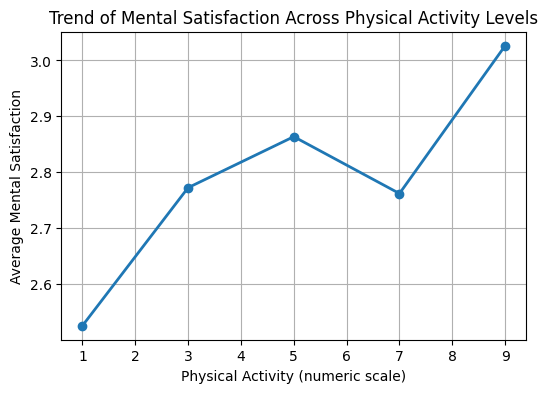

In [159]:
activity_avg = data.groupby('physical_activity')['MENT_LS'].mean().reset_index()

plt.figure(figsize=(6,4))
plt.plot(activity_avg['physical_activity'],activity_avg['MENT_LS'],marker='o',linestyle='-',linewidth=2)
plt.title("Trend of Mental Satisfaction Across Physical Activity Levels")
plt.xlabel("Physical Activity (numeric scale)")
plt.ylabel("Average Mental Satisfaction")
plt.grid(True)
plt.show()

Interpretation:
The line plot shows a clear upward trend in average mental satisfaction as physical activity increases.
Participants with low activity levels report lower mental satisfaction, while those engaging in more frequent physical activity display higher satisfaction scores.
This supports the t-test result, indicating that greater physical activity is associated with improved mental well-being and lower stress levels.

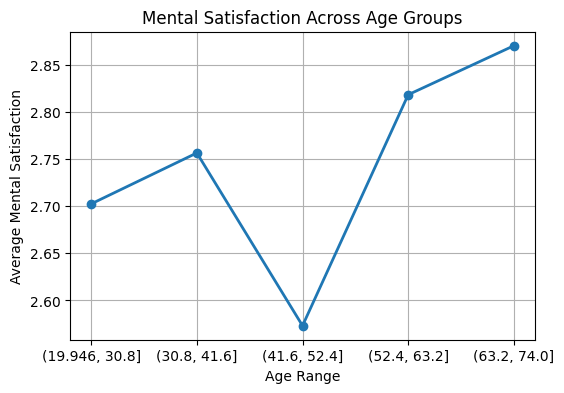

In [160]:
age_avg=data.groupby(pd.cut(data['age'],bins=5),observed=True)['MENT_LS'].mean().reset_index()

plt.figure(figsize=(6,4))
plt.plot(age_avg['age'].astype(str), age_avg['MENT_LS'],marker='o',linewidth=2)
plt.title("Mental Satisfaction Across Age Groups")
plt.xlabel("Age Range")
plt.ylabel("Average Mental Satisfaction")
plt.grid(True)
plt.show()

Interpretation: The line plot shows a gradual increase in average mental satisfaction with age.
After a minor dip in middle-aged participants, mental satisfaction rises sharply among older groups.
This supports the t-test result, indicating that older individuals generally experience higher mental satisfaction and lower stress levels compared to younger participants.

In [161]:
del age_avg, activity_avg, median_age, young, old, median_activity, high, low, data, df

## (Energetic arousal, Tense arousal, occasion, activity) - Nikunj

In [162]:
daily_survey = pd.read_csv(f"{file_loc}daily_survey.csv")

In [163]:
daily_survey = daily_survey[['participant', 'occasion', 'energetic_arousal', 'tense_arousal']]
daily_survey

,participant,occasion,energetic_arousal,tense_arousal
0,AMdzA,1,73,37
1,AMdzA,2,39,40
2,AMdzA,3,30,63
3,AMdzA,1,25,83
4,AMdzA,2,34,77
...,...,...,...,...
22558,rsgrE,3,19,15
22559,rsgrE,1,79,26
22560,rsgrE,2,79,29
22561,rsgrE,3,59,25


In [164]:
daily_survey.dtypes

participant          object
occasion              int64
energetic_arousal     int64
tense_arousal         int64
dtype: object

In [165]:
# Check if occasion column exists
if 'occasion' not in daily_survey.columns:
    raise KeyError("Column 'occasion' not found. Check your dataset headers!")

In [166]:
daily_survey = daily_survey[['participant', 'occasion', 'energetic_arousal', 'tense_arousal']].copy()

In [167]:
# Convert to string, remove spaces or .0, then map to times of day
daily_survey['occasion'] = (
    daily_survey['occasion']
    .astype(str)
    .str.strip()
    .str.replace('.0', '', regex=False)
)

In [168]:
# Define mapping
occasion_map = {'1': '10am', '2': '4pm', '3': '10pm'}
daily_survey['occasion'] = daily_survey['occasion'].map(occasion_map)

print("Unique occasion values after mapping:", daily_survey['occasion'].dropna().unique())

# Drop rows where occasion is missing after mapping
daily_survey = daily_survey.dropna(subset=['occasion'])

Unique occasion values after mapping: ['10am' '4pm' '10pm']


In [169]:

# HANDLE DUPLICATES (average same participant+occasion)
daily_survey = (
    daily_survey
    .groupby(['participant', 'occasion'], as_index=False)
    .mean(numeric_only=True)
)

In [170]:
#  PIVOT DATA TO WIDE FORMAT
pivot_energetic = daily_survey.pivot(index='participant', columns='occasion', values='energetic_arousal')
pivot_tense = daily_survey.pivot(index='participant', columns='occasion', values='tense_arousal')

print("Pivot energetic columns:", pivot_energetic.columns.tolist())

# Drop participants missing any of the 3 time points
pivot_energetic = pivot_energetic.dropna()
pivot_tense = pivot_tense.dropna()

Pivot energetic columns: ['10am', '10pm', '4pm']


In [171]:
# DEFINE FUNCTION FOR PAIRED T-TESTS
def paired_tests(pivot_df, label):
    results = []
    # Ensure consistent column order
    cols = [c for c in ['10am', '4pm', '10pm'] if c in pivot_df.columns]
    
    # Only run if at least two times exist
    if len(cols) < 2:
        print(f" Not enough time points for {label}. Found columns: {cols}")
        return pd.DataFrame()
    
    pairs = [(cols[0], cols[1]), (cols[1], cols[2]), (cols[0], cols[2])]
    
    for a, b in pairs:
        if a in pivot_df.columns and b in pivot_df.columns:
            t_stat, p_val = ttest_rel(pivot_df[a], pivot_df[b])
            n = pivot_df[[a, b]].dropna().shape[0]
            results.append({
                'Variable': label,
                'Comparison': f"{a} vs {b}",
                'n': n,
                't': round(t_stat, 3),
                'p': round(p_val, 4)
            })
    return pd.DataFrame(results)

In [172]:
# RUN THE TESTS
results_energetic = paired_tests(pivot_energetic, 'Energetic Arousal')
results_tense = paired_tests(pivot_tense, 'Tense Arousal')

results = pd.concat([results_energetic, results_tense], ignore_index=True)

# SHOW RESULTS
print("\n Paired t-test Results:")
print(results)


 Paired t-test Results:
            Variable    Comparison    n      t       p
0  Energetic Arousal   10am vs 4pm  366  8.205  0.0000
1  Energetic Arousal   4pm vs 10pm  366  4.934  0.0000
2  Energetic Arousal  10am vs 10pm  366  9.491  0.0000
3      Tense Arousal   10am vs 4pm  366  1.938  0.0534
4      Tense Arousal   4pm vs 10pm  366  1.885  0.0602
5      Tense Arousal  10am vs 10pm  366  3.187  0.0016


 **Interpretation**

Based on the paired t-test results:

Energetic Arousal

Very strong effect (large t values).
Energy is highest in the morning, declines by afternoon, and is lowest at night.
This aligns with normal circadian patterns; people are more alert early in the day and tend to become fatigued later.

Tense Arousal

Slight decline in restlessness across the day.
Only the morning-to-night difference is statistically reliable, suggesting participants feel calmer at night than in the morning, but the midday shifts are small.

**Conclusion:**

Paired t-tests comparing participants’ energetic and tense arousal ratings across daily survey occasions (10 am, 4 pm, and 10 pm) showed significant time-of-day effects.

Energetic arousal declined steadily from morning to evening (all p < 0.001), indicating participants became progressively less energetic throughout the day.

Tense arousal showed a smaller decrease, with only the 10 am vs 10 pm comparison reaching significance (p = 0.0016), suggesting participants were less tense at night.

These findings indicate that both alertness and restlessness tend to diminish as the day progresses, reflecting typical diurnal patterns and evening relaxation.

In [173]:
order = ['10am', '4pm', '10pm']

def plot_mean_se(var, ylabel):
    summary = (
        daily_survey
        .groupby('occasion')[var]
        .agg(['mean', 'sem'])
        .reindex(order)
    )
    plt.figure(figsize=(8,5))
    plt.errorbar(summary.index, summary['mean'], yerr=summary['sem'], fmt='-o', capsize=5)
    plt.title(f'Mean {ylabel} across Time of Day')
    plt.ylabel(f'{ylabel} (Mean ± SE)')
    plt.xlabel('Time of Day')
    plt.grid(alpha=0.3)
    plt.show()

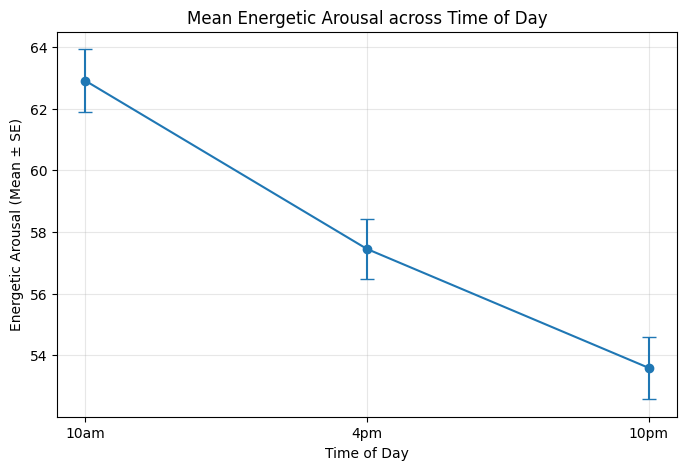

In [174]:
plot_mean_se('energetic_arousal', 'Energetic Arousal')

Interpretation:
The line plot clearly illustrates a strong downward trend in mean energetic arousal across the three survey times.
The error bars (SE) are relatively small, indicating consistent decreases across participants.
This supports the statistical finding that energy significantly declines as the day progresses.

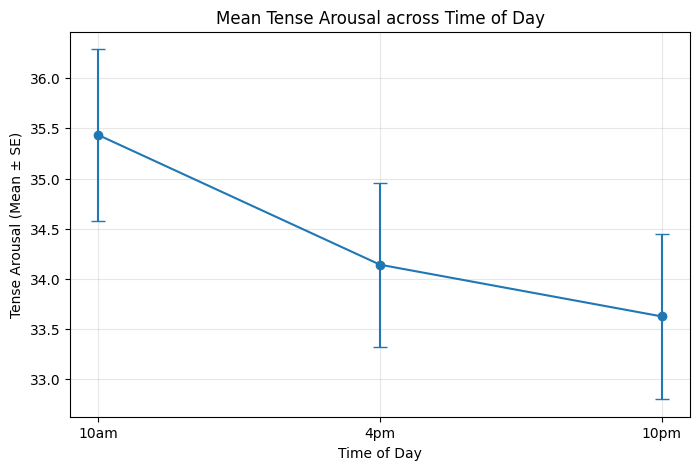

In [175]:
plot_mean_se('tense_arousal', 'Tense Arousal')

Interpretation:
The mean tense arousal line also trends downward, though less sharply than energetic arousal.
This suggests that participants gradually become calmer or less tense toward night, consistent with relaxation before bedtime.
The smaller slope aligns with the t-test results showing only the 10 am vs 10 pm comparison as statistically significant.

In [176]:
del order, results_energetic, results_tense, pivot_energetic, pivot_tense, daily_survey